A Data Analytics Solution for Death Risk Prediction

Data Quality Report

Import required packages

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read csv file, the dataset on which the data quality report will be based; dataset = variable df.

In [286]:
df = pd.read_csv("C:\\Users\\35385\\Desktop\\CS_Spring2024\\DataAnal\\Tom_Gibson_23222095_COMP47350_Homework1.zip\\covid19-cdc-23222095.csv", keep_default_na=True, delimiter=",", skipinitialspace=True, encoding="Windows-1252")

Check how many rows and columns dataset has

In [287]:
print("Number of Rows:", df.shape[0])
print("Number of Features/ Columns:", df.shape[1])

Number of Rows: 50000
Number of Features/ Columns: 19


Print the first and the last 5 rows; some missing values, further investigation required

In [288]:
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-04,CA,6.0,RIVERSIDE,6065.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,NaN
1,2020-04,CO,8.0,ARAPAHOE,8005.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,Yes,NaN
2,2020-03,NY,36.0,BRONX,36005.0,65+ years,Female,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,Yes
3,2021-09,FL,12.0,DUVAL,12031.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN
4,2020-07,TX,48.0,HARRIS,48201.0,50 to 64 years,Male,White,Hispanic/Latino,NaN,-5.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN


In [289]:
df.tail(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
49995,2022-05,MD,24.0,ANNE ARUNDEL,24003.0,18 to 49 years,Male,Missing,Missing,NaN,NaN,Missing,Missing,Probable Case,Missing,No,Missing,No,NaN
49996,2020-11,ID,16.0,ADA,16001.0,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,No,NaN
49997,2022-05,MN,27.0,WRIGHT,27171.0,0 - 17 years,Female,White,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
49998,2021-08,KY,21.0,NaN,NaN,18 to 49 years,Male,Black,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
49999,2021-09,NV,32.0,LYON,32019.0,0 - 17 years,Male,White,Non-Hispanic/Latino,1.0,0.0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


Check the features, their data types & non-null counts. Note from above that some values coded to "missing", "unknown" or "na" alreeady

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       50000 non-null  object 
 1   res_state                        49998 non-null  object 
 2   state_fips_code                  49998 non-null  float64
 3   res_county                       47030 non-null  object 
 4   county_fips_code                 47030 non-null  float64
 5   age_group                        49588 non-null  object 
 6   sex                              48881 non-null  object 
 7   race                             43821 non-null  object 
 8   ethnicity                        43254 non-null  object 
 9   case_positive_specimen_interval  26437 non-null  float64
 10  case_onset_interval              21433 non-null  float64
 11  process                          50000 non-null  object 
 12  exposure_yn       

Convert features to their appropriate data types.
case_positive_specimen_interval and case_onset_interval are continuous data types, representing time in weeks.
case_month, res_state, state_fips_code, res_county, county_fips_code, age_group, sex, race, ethnicity, process, exposure_yn, current_status, symptom_status, hosp_yn, icu_yn, death_yn, underlying_conditions_yn all converted to type "category" from type "object" or type "float64"

In [291]:
object_columns = df.select_dtypes(["object"]).columns #select all columns of type "object"
categorical_columns = object_columns

for column in categorical_columns: #convert selected columns to type "category"
    df[column] = df[column].astype("category")
df[["state_fips_code", "county_fips_code"]] = df[["state_fips_code", "county_fips_code"]].astype("category")

df.dtypes #check changes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

Look for and print duplicate rows; although it appears otherwise, no duplicate rows present due to lack of identifiers and k-anonymity

In [292]:
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:\n", duplicate_rows)

Duplicate rows found:
       case_month res_state state_fips_code    res_county county_fips_code  \
167      2020-04        IL            17.0          COOK          17031.0   
252      2020-04        IL            17.0          COOK          17031.0   
404      2020-11        IN            18.0        DEKALB          18033.0   
418      2020-04        MA            25.0       NORFOLK          25021.0   
442      2021-01        AZ             4.0      MARICOPA           4013.0   
...          ...       ...             ...           ...              ...   
49974    2022-05        MD            24.0     BALTIMORE          24005.0   
49980    2022-01        MN            27.0     ST. LOUIS          27137.0   
49986    2021-09        TN            47.0     HENDERSON          47077.0   
49995    2022-05        MD            24.0  ANNE ARUNDEL          24003.0   
49996    2020-11        ID            16.0           ADA          16001.0   

            age_group     sex     race            et

Look for and print duplicate columns; none present

In [293]:
transpose_df = df.T
duplicate_columns = transpose_df[transpose_df.duplicated()]
if duplicate_columns.empty:
    print("There are no duplicate columns")
else:
    print("Duplicate columns found:\n", duplicate_columns)

There are no duplicate columns


Look for and print constant columns; none present

In [294]:
constant_columns = df.columns[df.nunique() == 1]

if constant_columns.empty:
    print("No constant columns found.")
else:
    print("Constant columns found:", constant_columns)

No constant columns found.


Drop state_fips_code & res_county, they contain same information as other features and so are duplicates

In [295]:
df.drop(["state_fips_code", "res_county"], axis=1, inplace=True)

Data Integrity Test: if yes for icu_yn (person was admitted to Intensive Care Unit) also ensure that yes for hosp_yn (patient was also hospitalised). 4 rows found indicating potential data entry errors. Rows dropped from Database.

In [296]:
#if yes for icu_yn (person was admitted to Intensive Care Unit) also ensure that yes for hosp_yn (patient was also hospitalised)
potential_errors = df.loc[(df["hosp_yn"] == "No") & (df["icu_yn"]=="Yes")]
print(potential_errors)

      case_month res_state county_fips_code       age_group   sex     race  \
2591     2021-12        UT          49035.0  50 to 64 years  Male    White   
5724     2021-04        NV          32003.0       65+ years  Male    White   
18957    2021-09        KS              NaN  50 to 64 years  Male  Unknown   
40575    2021-07        NV          32003.0  18 to 49 years  Male  Unknown   

                 ethnicity  case_positive_specimen_interval  \
2591   Non-Hispanic/Latino                              0.0   
5724   Non-Hispanic/Latino                              0.0   
18957              Unknown                              NaN   
40575      Hispanic/Latino                              1.0   

       case_onset_interval               process exposure_yn  \
2591                   NaN               Missing     Missing   
5724                   0.0  Routine surveillance     Missing   
18957                  0.0               Missing     Missing   
40575                  0.0           

Save updated/cleaned data frame to new csv file, "semi_cleaned_data"

In [297]:
file_path = "C:\\Users\\35385\\Desktop\\CS_Spring2024\\DataAnal\\Tom_Gibson_23222095_COMP47350_Homework1.zip\\semi_cleaned_data.csv"
df.to_csv(file_path, index=False)

In [298]:
df = pd.read_csv("C:\\Users\\35385\\Desktop\\CS_Spring2024\\DataAnal\\Tom_Gibson_23222095_COMP47350_Homework1.zip\\semi_cleaned_data.csv", keep_default_na=True, delimiter=",", skipinitialspace=True, encoding="Windows-1252")

In [299]:
object_columns = df.select_dtypes(["object"]).columns #select all columns of type "object"
categorical_columns = object_columns

for column in categorical_columns: #convert selected columns to type "category"
    df[column] = df[column].astype("category")
df["county_fips_code"] = df["county_fips_code"].astype("category")

Confirm the above features have been dropped

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   case_month                       50000 non-null  category
 1   res_state                        49998 non-null  category
 2   county_fips_code                 47030 non-null  category
 3   age_group                        49588 non-null  category
 4   sex                              48881 non-null  category
 5   race                             43821 non-null  category
 6   ethnicity                        43254 non-null  category
 7   case_positive_specimen_interval  26437 non-null  float64 
 8   case_onset_interval              21433 non-null  float64 
 9   process                          50000 non-null  category
 10  exposure_yn                      50000 non-null  category
 11  current_status                   50000 non-null  category
 12  symp

Prepare table with descriptive statistics for all continuous (numerical) features - case_positive_specimen_interval & case_onset_interval: count of non-null values, mean, standard deviation, minimum, 1st + 2nd + 3rd quartiles, maximum, % of missing values, cardinality.
This is not a definitive list. More insight will be gained from visual analysis of these data presented on histograms and boxplots, below. Any data quality issues are noted in the attached pdf.

In [301]:
continuous_features = df.select_dtypes(include=["float64"])

stats = continuous_features.describe().T
missing_percentages = (continuous_features.isnull().mean() * 100).round(2)
cardinalities = continuous_features.nunique()

report = pd.DataFrame(columns=["Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max", "Missing%", "Cardinality"])

for column in continuous_features.columns:
    count = stats.loc[column, "count"]
    mean = stats.loc[column, "mean"]
    std = stats.loc[column, "std"]
    minimum = stats.loc[column, "min"]
    quartile_25 = stats.loc[column, "25%"]
    median = stats.loc[column, "50%"]
    quartile_75 = stats.loc[column, "75%"]
    maximum = stats.loc[column, "max"]
    
    missing_percentage = missing_percentages.get(column, 0)
    cardinality = cardinalities.get(column, 0)
    
    report.loc[column] = [count, mean, std, minimum, quartile_25, median, quartile_75, maximum, f"{missing_percentage}%", cardinality]

report

,Count,Mean,Std,Min,25%,50%,75%,Max,Missing%,Cardinality
case_positive_specimen_interval,26437.0,0.165563,2.612721,-112.0,0.0,0.0,0.0,122.0,47.13%,76
case_onset_interval,21433.0,-0.044324,2.083300,-106.0,0.0,0.0,0.0,64.0,57.13%,70


Tables with descriptive statistics for each of the categorical features

In [302]:
category_columns = df.select_dtypes(["category"]).columns
s_c_df_category_table = pd.DataFrame(columns=["Mode", "Second_Mode", "Frequency_Mode", "Freq_Second_Mode", 
                                             "Proportion_Mode", "Proportion_Second_Mode", "Missing", "Cardinality"])

for column in category_columns:
    mode_counts = df[column].value_counts(dropna=False)
    mode = mode_counts.index[0]
    second_mode = mode_counts.index[1]
    freq_mode = mode_counts.iloc[0]
    freq_second_mode = mode_counts.iloc[1]
    proportion_mode = (freq_mode / len(df)) * 100
    proportion_second_mode = (freq_second_mode / len(df)) * 100
    
    missing_percent = df[column].isnull().mean() * 100
    cardinality = len(df[column].unique())
    
    row_values = [mode, second_mode, freq_mode, freq_second_mode, f"{proportion_mode:.2f}%", f"{proportion_second_mode:.2f}%", f"{missing_percent:.2f}%", cardinality]
    
    s_c_df_category_table.loc[column] = row_values

s_c_df_category_table

,Mode,Second_Mode,Frequency_Mode,Freq_Second_Mode,Proportion_Mode,Proportion_Second_Mode,Missing,Cardinality
case_month,2022-01,2020-12,6354,3850,12.71%,7.70%,0.00%,40
res_state,NY,NC,5548,4778,11.10%,9.56%,0.00%,51
county_fips_code,NaN,12086.0,2970,1025,5.94%,2.05%,5.94%,1341
age_group,18 to 49 years,65+ years,20171,14159,40.34%,28.32%,0.82%,6
sex,Female,Male,25482,23165,50.96%,46.33%,2.24%,5
race,White,NaN,30531,6179,61.06%,12.36%,12.36%,9
ethnicity,Non-Hispanic/Latino,Unknown,29602,6934,59.20%,13.87%,13.49%,5
process,Missing,Clinical evaluation,45416,2191,90.83%,4.38%,0.00%,10
exposure_yn,Missing,Yes,43074,4886,86.15%,9.77%,0.00%,3
current_status,Laboratory-confirmed case,Probable Case,42104,7896,84.21%,15.79%,0.00%,2


Plot histograms for all continuous features.
Original plotting of histograms for the continuous data was unclear, and so bin size was increased, and the scale representing the number of patients was set to logarithmic, both aiding with visualisation.

Histogram of continuous feature, case_positive_specimen_interval (Time between Case and Positive Specimen)

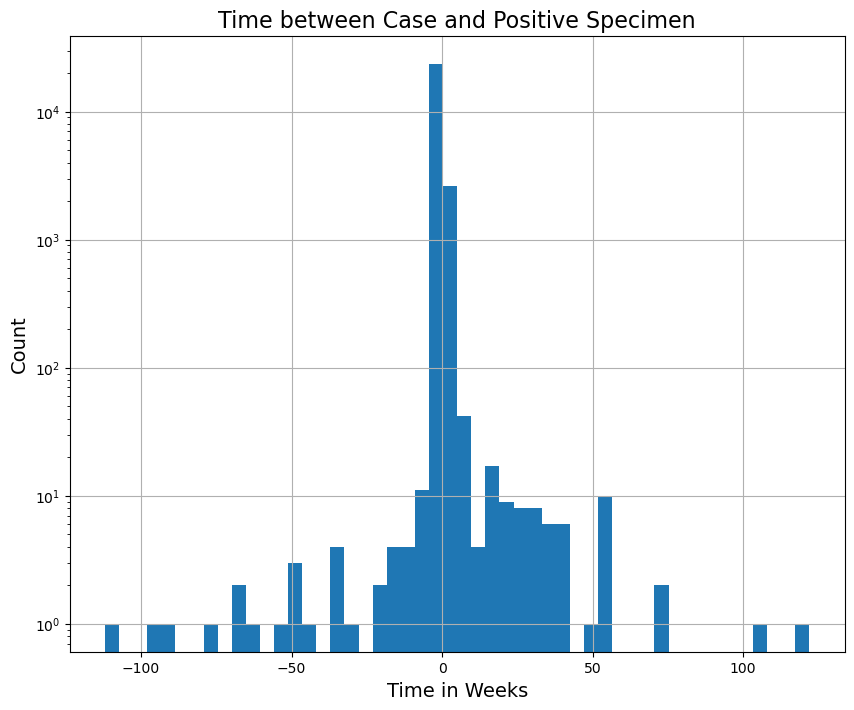

In [303]:
df["case_positive_specimen_interval"].hist(figsize=(10, 8), bins=50, log=True)
plt.title("Time between Case and Positive Specimen", fontsize=16)

plt.xlabel("Time in Weeks", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

Histogram of continuous feature, case_onset_interval (Time between Earliest Date and Symptom Onset)

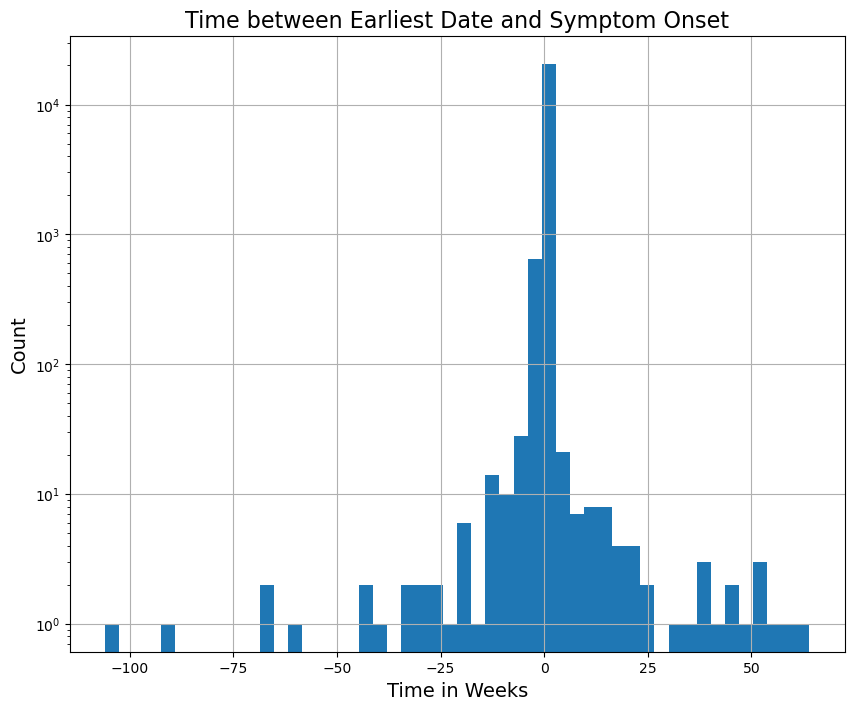

In [304]:
df["case_onset_interval"].hist(figsize=(10, 8), bins=50, log=True)
plt.title("Time between Earliest Date and Symptom Onset", fontsize=16)
plt.xlabel("Time in Weeks", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

Plot boxplots for all continuous features;
1st, 2nd and 3rd quartiles are all 0

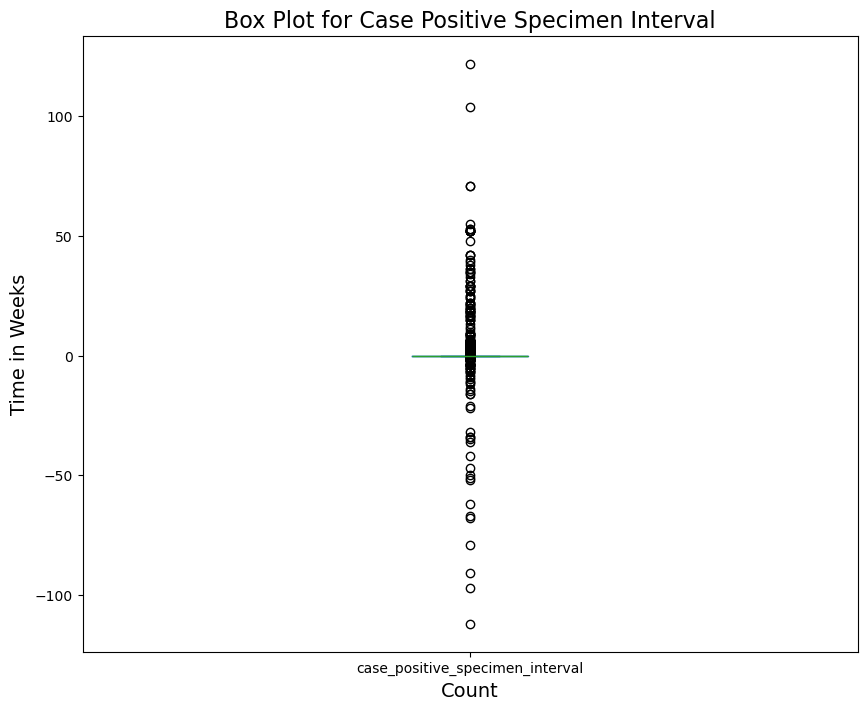

In [305]:
plt.figure(figsize=(10, 8))
df["case_positive_specimen_interval"].plot(kind="box", whis=1.5)
plt.title("Box Plot for Case Positive Specimen Interval", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Time in Weeks", fontsize=14)

plt.show()

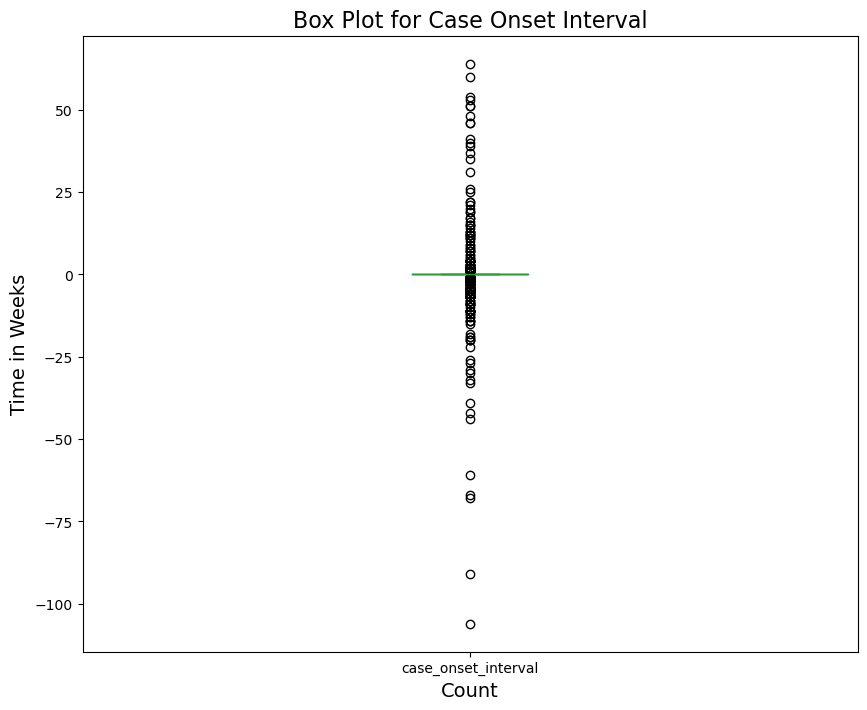

In [306]:
plt.figure(figsize=(10, 8))
df["case_onset_interval"].plot(kind="box")
plt.title("Box Plot for Case Onset Interval", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Time in Weeks", fontsize=14)
plt.show()

Plot bar plots for all categorical features. Many features have values with low counts; each feature was then filtered individually for cleaner bar plots


Checking values of features in order to produce more informative visualisations

In [307]:
for column in category_columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for case_month:
case_month
2022-01    6354
2020-12    3850
2021-12    3362
2021-01    3263
2020-11    3123
2021-08    2037
2021-09    1905
2020-04    1640
2021-11    1559
2022-05    1524
2020-10    1404
2021-10    1267
2020-07    1189
2021-02    1161
2021-03    1092
2022-07    1083
2021-04    1017
2022-08     953
2022-02     939
2022-06     922
2020-08     919
2021-07     872
2020-09     785
2022-12     781
2020-05     766
2020-06     726
2022-11     720
2022-09     636
2022-04     601
2020-03     601
2023-01     589
2021-05     494
2022-10     462
2023-03     380
2023-02     366
2022-03     289
2021-06     237
2023-04     119
2020-01      12
2020-02       1
Name: count, dtype: int64

Value counts for res_state:
res_state
NY    5548
NC    4778
NJ    4503
FL    3839
IN    2873
TX    2763
OH    2701
MN    2561
MD    1812
KY    1750
CA    1524
KS    1325
MI    1262
AZ    1239
VA    1060
PA     932
SC     790
WI     773
OR     667
NV     634
OK     585
MA     585
UT     572
TN

Bar Plot of categorical feature: case_month

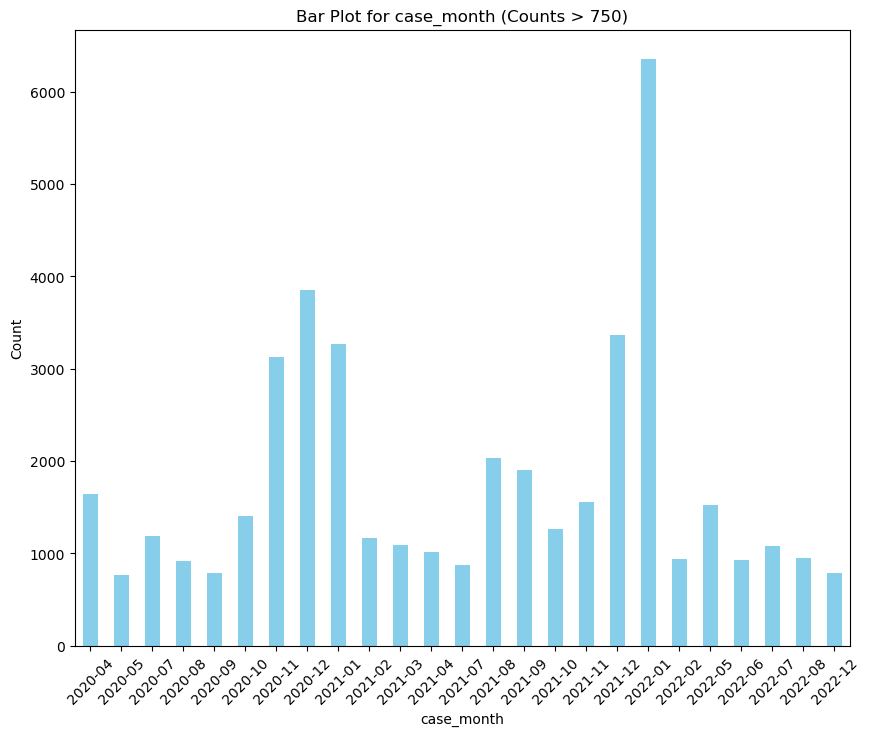

In [308]:
case_month_counts = df["case_month"].value_counts()
case_month_counts_filtered = case_month_counts[case_month_counts > 750].sort_index()

plt.figure(figsize=(10, 8))
case_month_counts_filtered.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for case_month (Counts > 750)")
plt.xlabel("case_month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: res_state

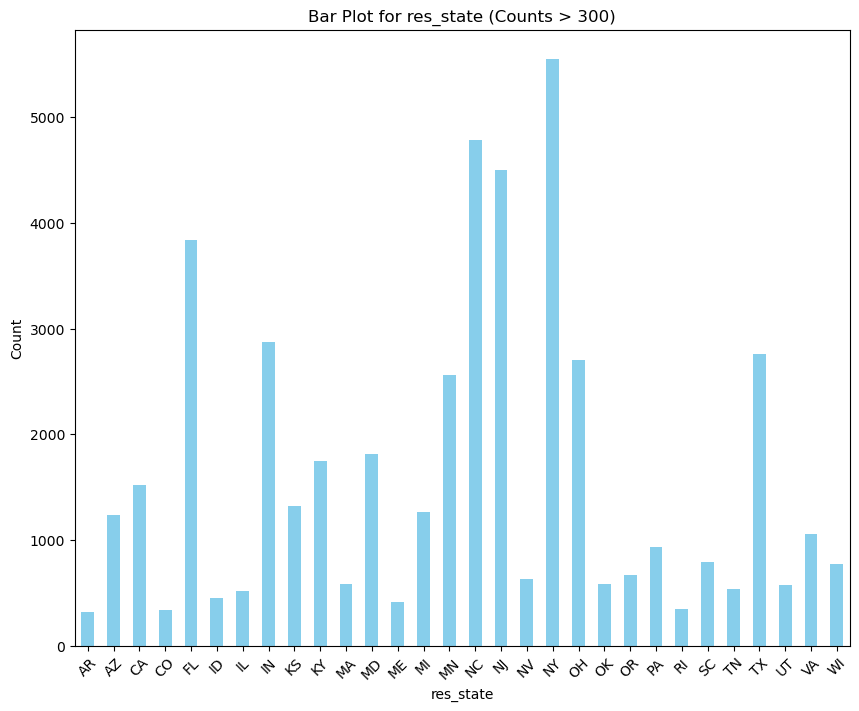

In [309]:
res_state_counts = df["res_state"].value_counts()
res_state_counts_filtered = res_state_counts[res_state_counts > 300].sort_index()

plt.figure(figsize=(10, 8))
res_state_counts_filtered.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for res_state (Counts > 300)")
plt.xlabel("res_state")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: county_fips_code

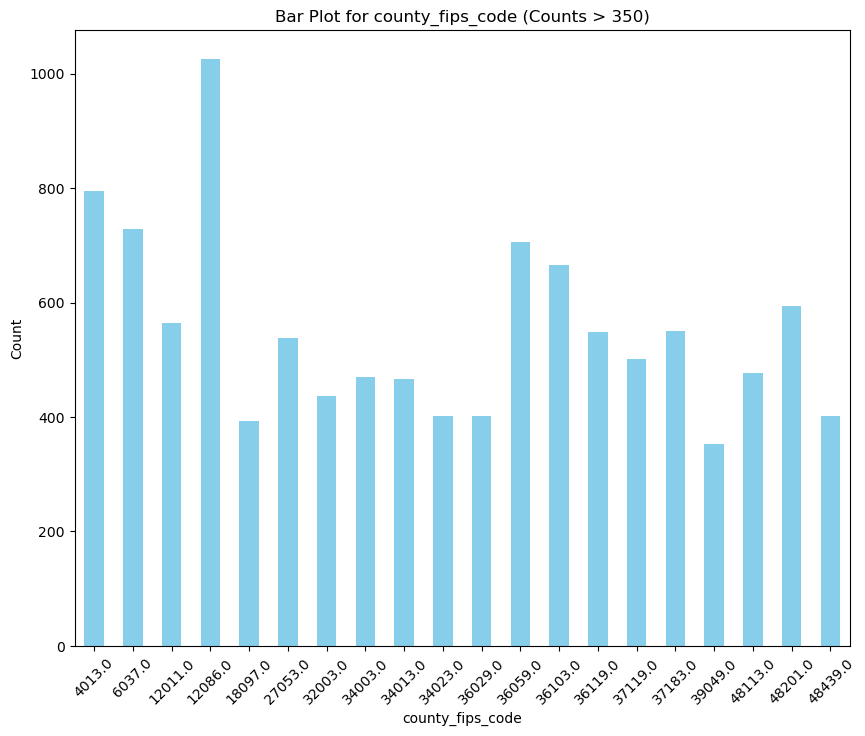

In [310]:
county_fips_code_counts = df["county_fips_code"].value_counts()
county_fips_code_counts_filtered = county_fips_code_counts[county_fips_code_counts > 350].sort_index()

plt.figure(figsize=(10, 8))
county_fips_code_counts_filtered.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for county_fips_code (Counts > 350)")
plt.xlabel("county_fips_code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: age_group

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\3142489887.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["age_group"] = df["age_group"].replace({"Missing": "Missing or Unknown"})
C:\Users\35385\AppData\Local\Temp\ipykernel_27904\3142489887.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age_group"

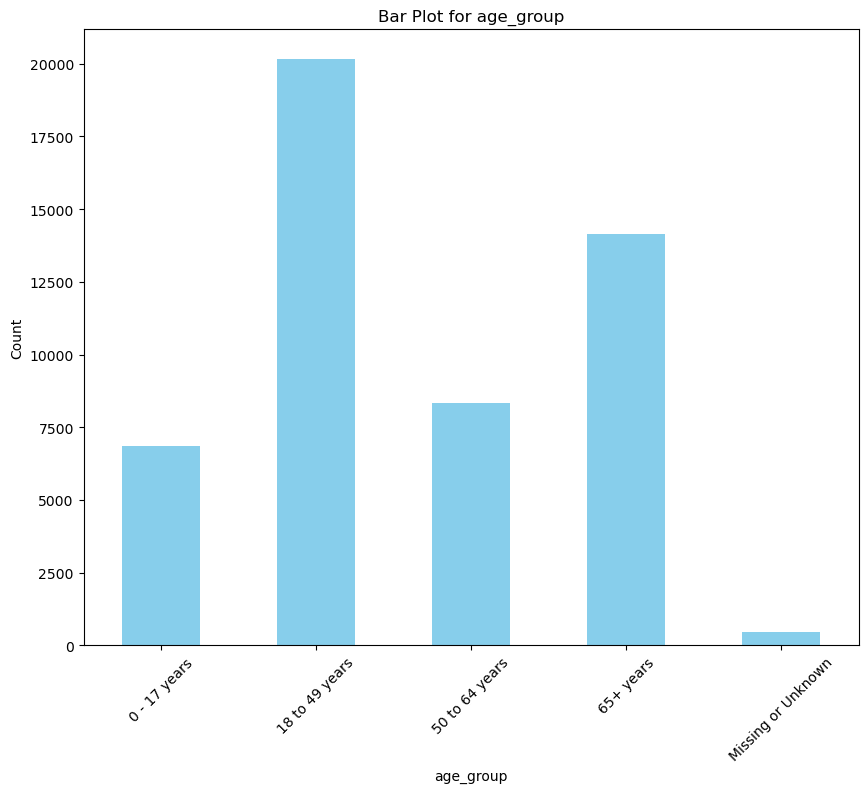

In [311]:
df["age_group"] = df["age_group"].replace({"Unknown": "Missing or Unknown"})
df["age_group"] = df["age_group"].replace({"Missing": "Missing or Unknown"})
df["age_group"].fillna("Missing or Unknown", inplace=True)

age_group_counts = df["age_group"].value_counts(dropna=False).sort_index()


plt.figure(figsize=(10, 8))
age_group_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for age_group")
plt.xlabel("age_group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: sex

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\509657933.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["sex"] = df["sex"].replace({"Unknown": "Missing or Unknown"})
C:\Users\35385\AppData\Local\Temp\ipykernel_27904\509657933.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["sex"] = df["sex"].replace({"Missing": "Missing or Unknown"})
C:\Users\35385\AppData\Local\Temp\ipykernel_27904\509657933.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will ch

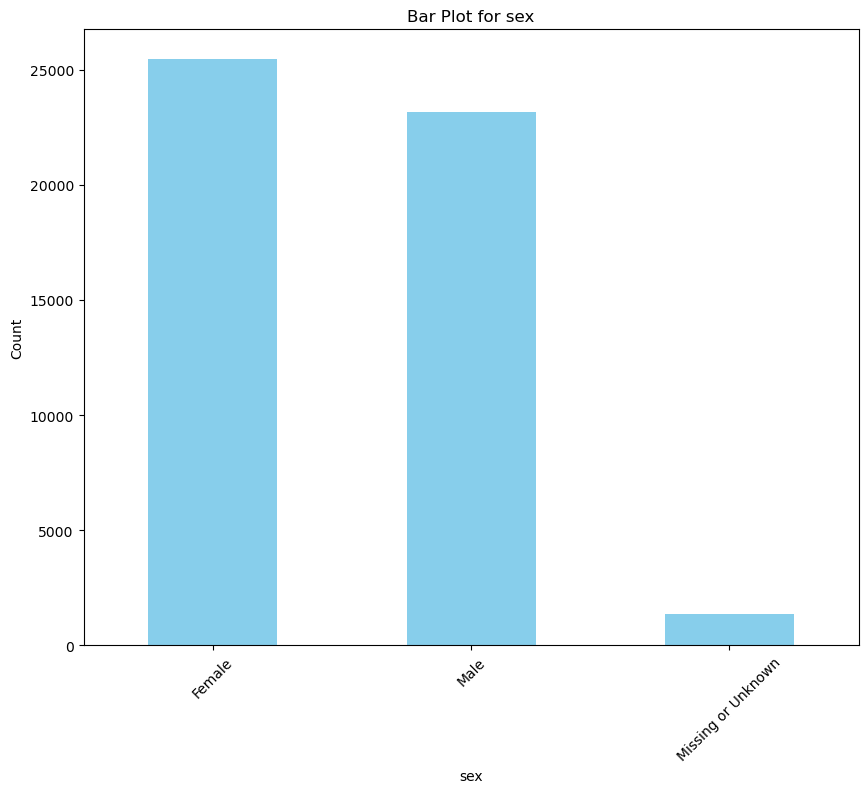

In [312]:
df["sex"] = df["sex"].replace({"Unknown": "Missing or Unknown"})
df["sex"] = df["sex"].replace({"Missing": "Missing or Unknown"})
df["sex"].fillna("Missing or Unknown", inplace=True)

sex_counts = df["sex"].value_counts(dropna=False).sort_index()

plt.figure(figsize=(10, 8))
sex_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for sex")
plt.xlabel("sex")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Bar Plot of categorical feature: race

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\2321148687.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["race"] = df["race"].replace({"Unknown": "Missing or Unknown"})
C:\Users\35385\AppData\Local\Temp\ipykernel_27904\2321148687.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["race"] = df["race"].replace({"Missing": "Missing or Unknown"})
C:\Users\35385\AppData\Local\Temp\ipykernel_27904\2321148687.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior 

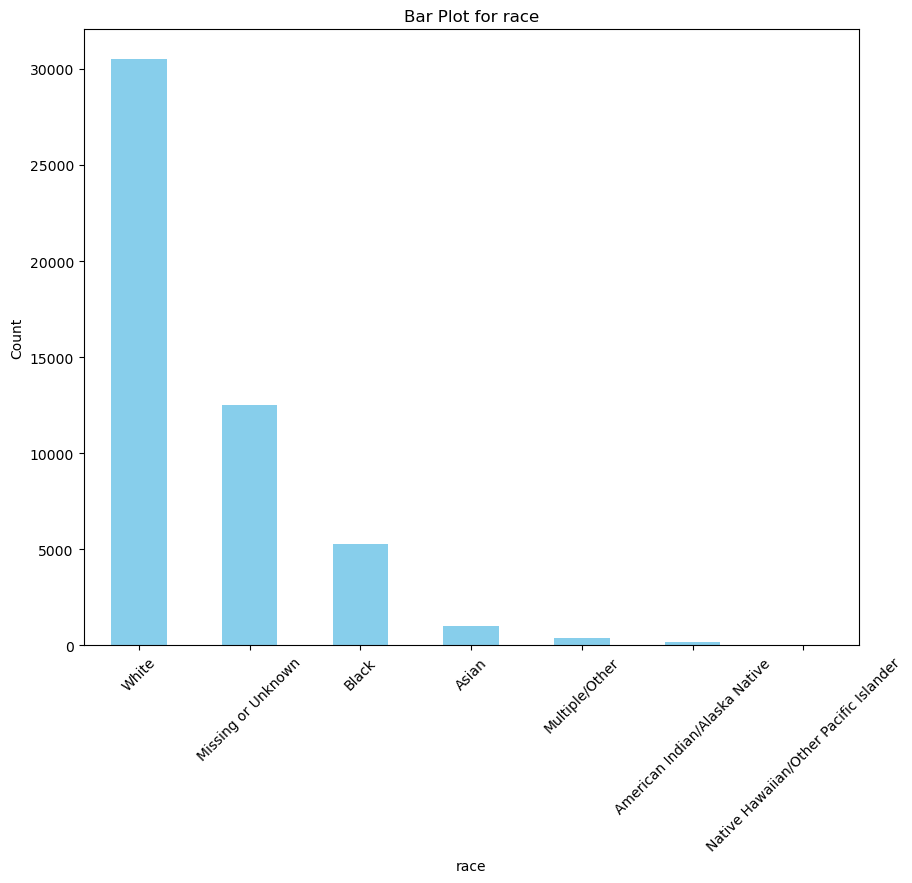

In [313]:
df["race"] = df["race"].replace({"Unknown": "Missing or Unknown"})
df["race"] = df["race"].replace({"Missing": "Missing or Unknown"})
df["race"].fillna("Missing or Unknown", inplace=True)

race_counts = df["race"].value_counts(dropna=False)

plt.figure(figsize=(10, 8))
race_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for race")
plt.xlabel("race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: ethnicity

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\3984912946.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["ethnicity"] = df["ethnicity"].replace({"Unknown": "Missing or Unknown"})
C:\Users\35385\AppData\Local\Temp\ipykernel_27904\3984912946.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["ethnicity"] = df["ethnicity"].replace({"Missing": "Missing or Unknown"})
C:\Users\35385\AppData\Local\Temp\ipykernel_27904\3984912946.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace m

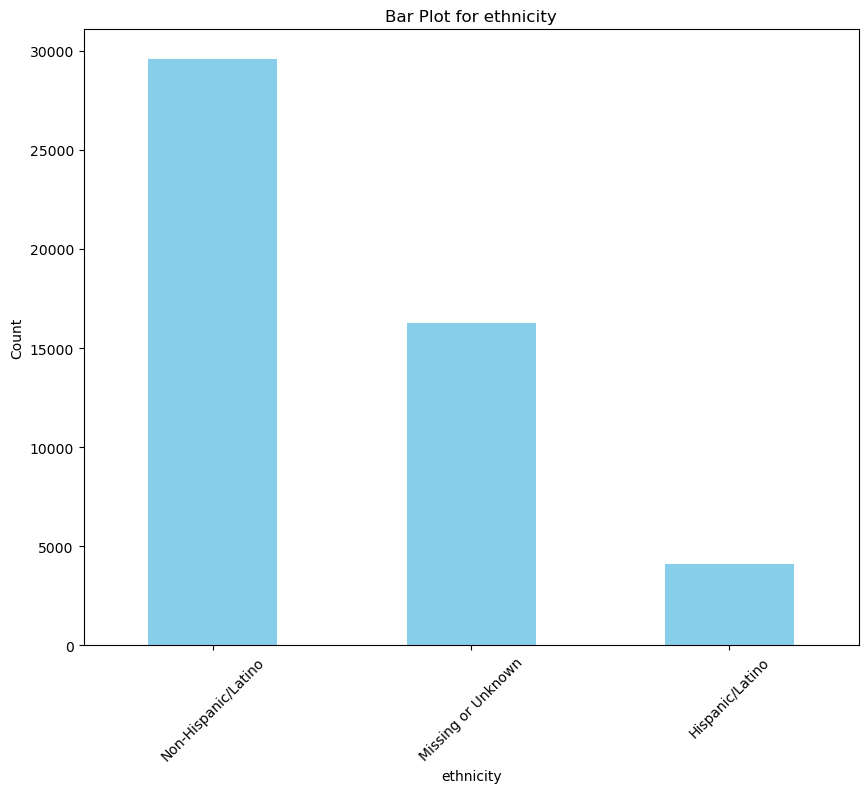

In [314]:
df["ethnicity"] = df["ethnicity"].replace({"Unknown": "Missing or Unknown"})
df["ethnicity"] = df["ethnicity"].replace({"Missing": "Missing or Unknown"})
df["ethnicity"].fillna("Missing or Unknown", inplace=True)

ethnicity_counts = df["ethnicity"].value_counts(dropna=False)

plt.figure(figsize=(10, 8))
ethnicity_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for ethnicity")
plt.xlabel("ethnicity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: process

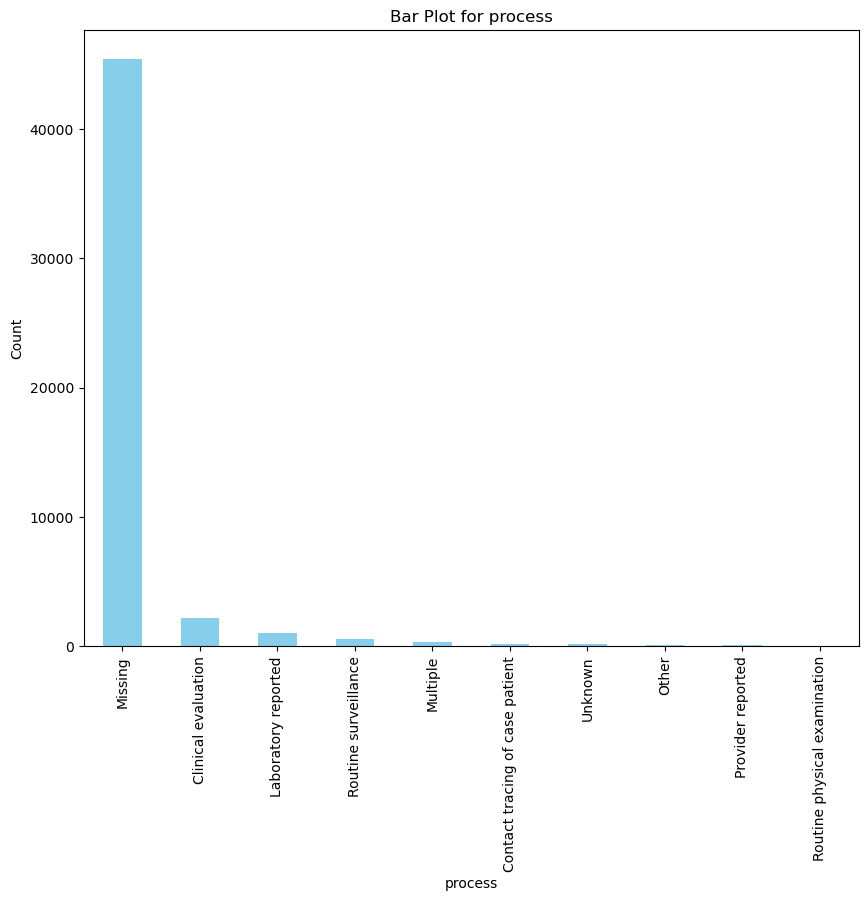

In [315]:
process_counts = df["process"]
process_counts = process_counts.value_counts(dropna=False)

plt.figure(figsize=(10, 8))
process_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for process")
plt.xlabel("process")
plt.ylabel("Count")
plt.show()

Bar Plot of categorical feature: exposure_yn

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\3438620219.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  exposure_yn_counts = df["exposure_yn"].replace({"Unknown": "Missing or Unknown"})
C:\Users\35385\AppData\Local\Temp\ipykernel_27904\3438620219.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  exposure_yn_counts = exposure_yn_counts.replace({"Missing": "Missing or Unknown"})


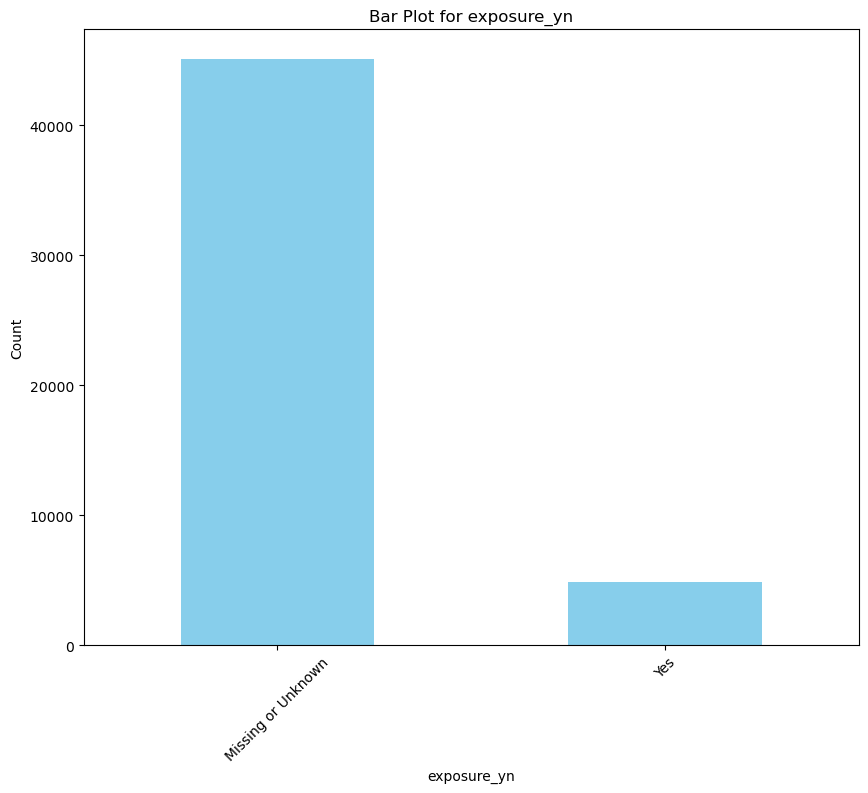

In [316]:
exposure_yn_counts = df["exposure_yn"].replace({"Unknown": "Missing or Unknown"})
exposure_yn_counts = exposure_yn_counts.replace({"Missing": "Missing or Unknown"})
exposure_yn_counts = exposure_yn_counts.value_counts(dropna=False)

plt.figure(figsize=(10, 8))
exposure_yn_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for exposure_yn")
plt.xlabel("exposure_yn")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: current_status

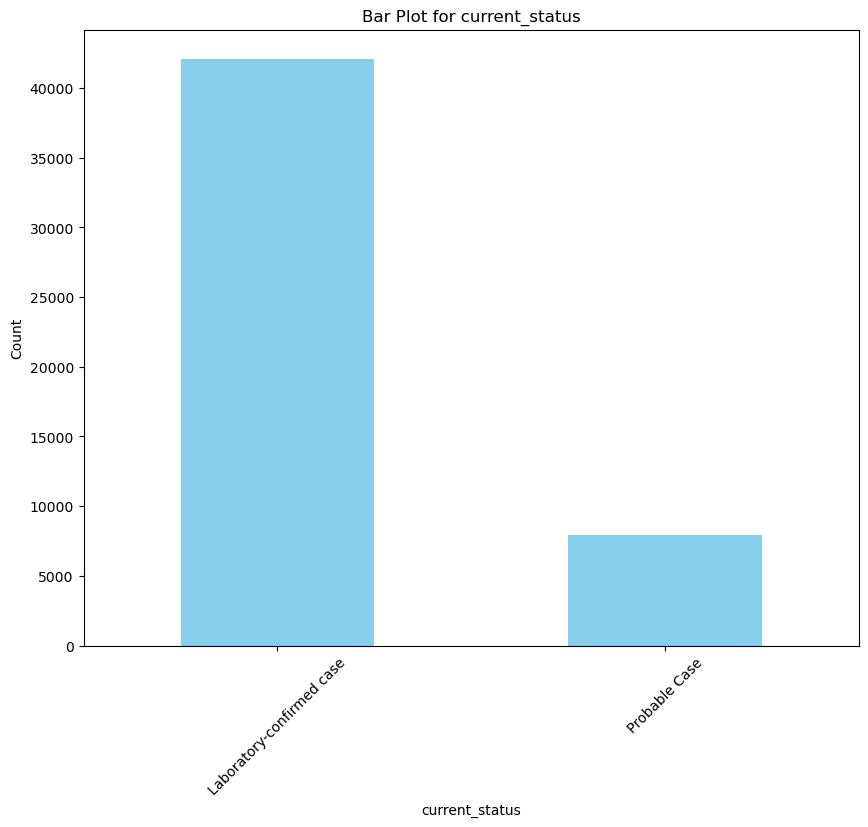

In [317]:
current_status_counts = df["current_status"].value_counts(dropna=False)

plt.figure(figsize=(10, 8))
current_status_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for current_status")
plt.xlabel("current_status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: symptom_status

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\1311840528.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  symptom_status_counts = df["symptom_status"].replace({"Unknown": "Missing or Unknown"})
C:\Users\35385\AppData\Local\Temp\ipykernel_27904\1311840528.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  symptom_status_counts = symptom_status_counts.replace({"Missing": "Missing or Unknown"})


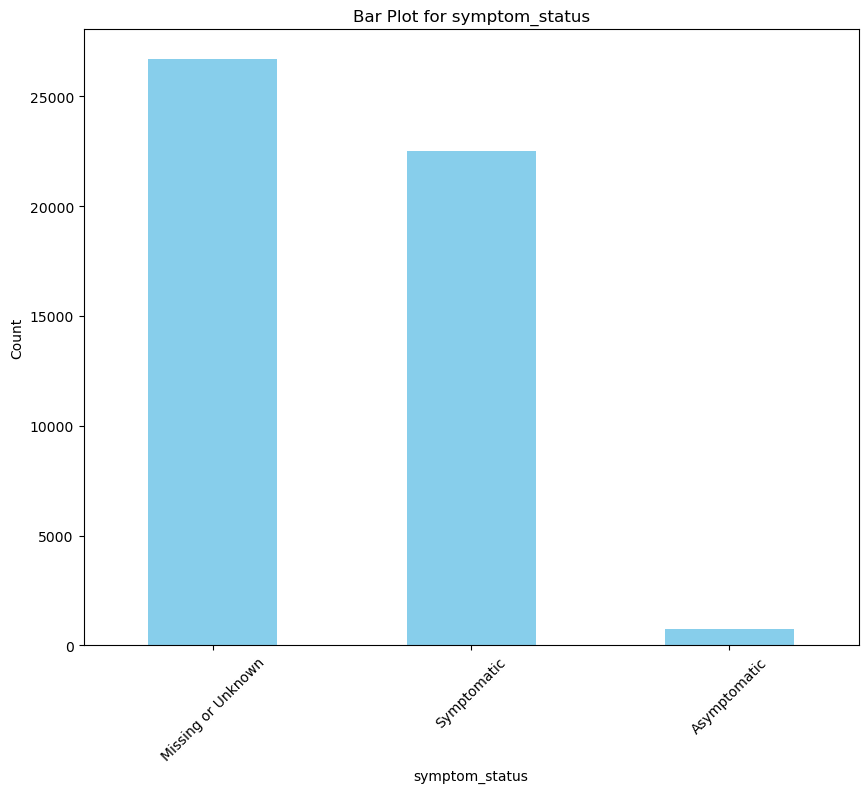

In [318]:
symptom_status_counts = df["symptom_status"].replace({"Unknown": "Missing or Unknown"})
symptom_status_counts = symptom_status_counts.replace({"Missing": "Missing or Unknown"})
symptom_status_counts = symptom_status_counts.value_counts(dropna=False)

plt.figure(figsize=(10, 8))
symptom_status_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for symptom_status")
plt.xlabel("symptom_status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: hosp_yn

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\3432746178.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hosp_yn_counts = df["hosp_yn"].replace({"Unknown": "Missing or Unknown"})
C:\Users\35385\AppData\Local\Temp\ipykernel_27904\3432746178.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hosp_yn_counts = hosp_yn_counts.replace({"Missing": "Missing or Unknown"})


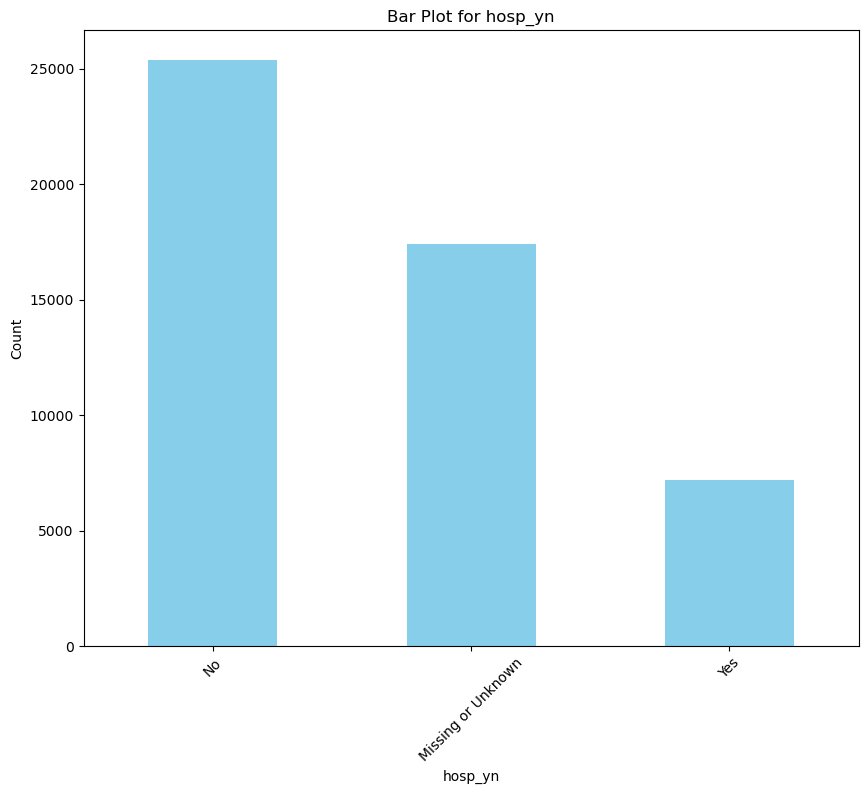

In [319]:
hosp_yn_counts = df["hosp_yn"].replace({"Unknown": "Missing or Unknown"})
hosp_yn_counts = hosp_yn_counts.replace({"Missing": "Missing or Unknown"})
hosp_yn_counts = hosp_yn_counts.value_counts(dropna=False)

plt.figure(figsize=(10, 8))
hosp_yn_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for hosp_yn")
plt.xlabel("hosp_yn")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: icu_yn

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\46614048.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  icu_yn_counts = df["icu_yn"].replace({"Unknown": "Missing or Unknown"})
C:\Users\35385\AppData\Local\Temp\ipykernel_27904\46614048.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  icu_yn_counts = icu_yn_counts.replace({"Missing": "Missing or Unknown"})


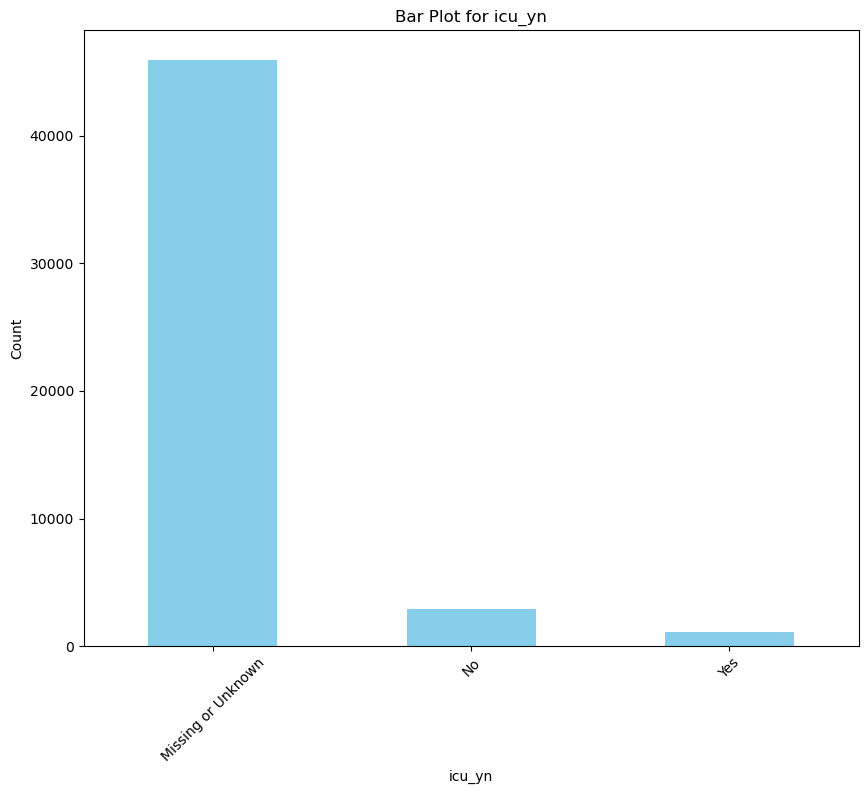

In [320]:
icu_yn_counts = df["icu_yn"].replace({"Unknown": "Missing or Unknown"})
icu_yn_counts = icu_yn_counts.replace({"Missing": "Missing or Unknown"})
icu_yn_counts = icu_yn_counts.value_counts(dropna=False)

plt.figure(figsize=(10, 8))
icu_yn_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for icu_yn")
plt.xlabel("icu_yn")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: death_yn

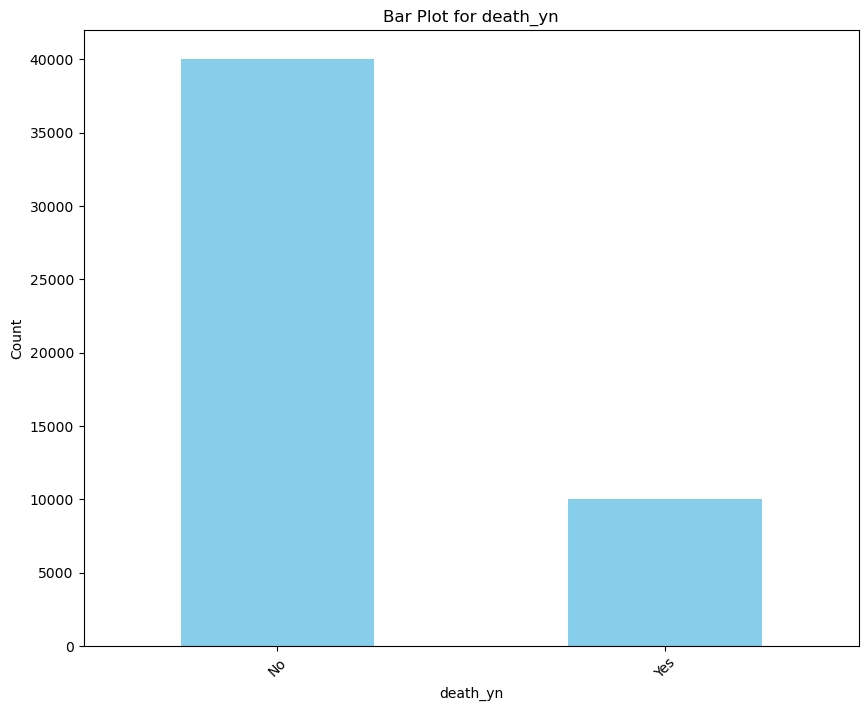

In [321]:
death_yn_counts = df["death_yn"].value_counts(dropna=False)

plt.figure(figsize=(10, 8))
death_yn_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for death_yn")
plt.xlabel("death_yn")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Bar Plot of categorical feature: underlying_conditions_yn

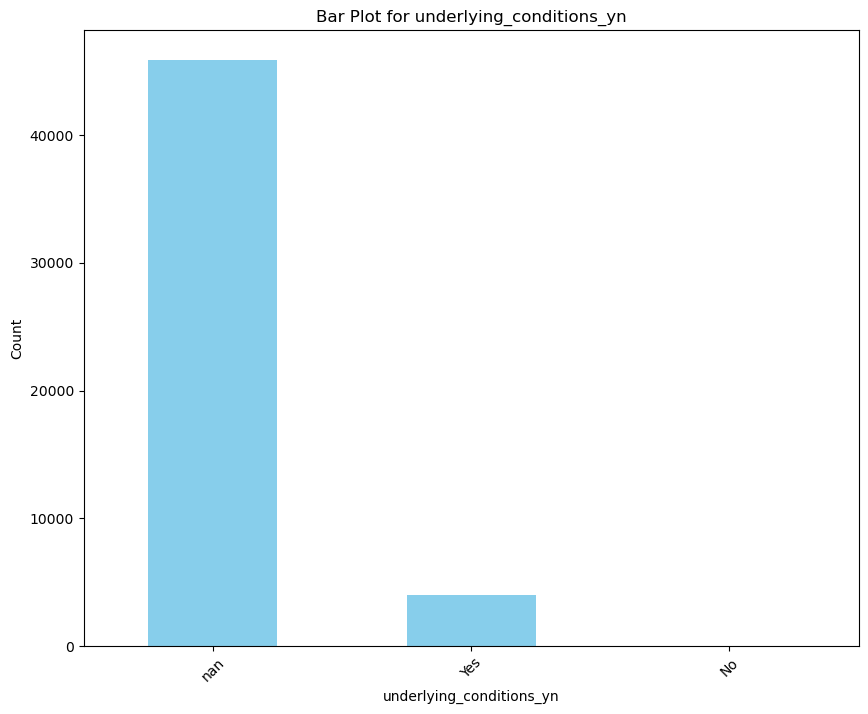

In [322]:
underlying_conditions_yn_counts = df["underlying_conditions_yn"].replace({"Unknown": "Missing or Unknown"})
underlying_conditions_yn_counts = underlying_conditions_yn_counts.replace({"Missing": "Missing or Unknown"})
underlying_conditions_yn_counts = underlying_conditions_yn_counts.value_counts(dropna=False)

plt.figure(figsize=(10, 8))
underlying_conditions_yn_counts.plot(kind="bar", color="skyblue")
plt.title("Bar Plot for underlying_conditions_yn")
plt.xlabel("underlying_conditions_yn")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Examining the data in greater detail for cleaning in preparation of the Data Quality Plan
Some features in CSV already coded to "Missing"/ "Unknown"/ "NA", and so won"t show as "Missing" here; further insight needed.

In [323]:
df.isnull().sum()

case_month                             0
res_state                              2
county_fips_code                    2970
age_group                              0
sex                                    0
race                                   0
ethnicity                              0
case_positive_specimen_interval    23563
case_onset_interval                28567
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           45911
dtype: int64

Data Inspection: Continuous Features

Investigate case_positive_specimen_interval: 
47.126% of datapoints are NaN. 
23,562 of 26,437 recorded datapoints are 0 (89.125%). 
133 values are negative. In the context of case_positive_specimen_interval, this means there was a negative time between symptom onset or the date of exposure, and the first positive lab specimen - these values represent invalid data. Missing Indicator Feature not useful, as this feature doesn"t have a relationship to target feature.
Drop from database due to Missing Values. 

In [324]:
#outliers = value of the z-score is greater than 3 (+3 standard deviations away from the mean)
cpsi = df["case_positive_specimen_interval"].dropna()

#central tendency
mean_value = cpsi.mean()
mode_value = cpsi.mode().iloc[0]
std_deviation = cpsi.std() #standard deviation
z_scores = (cpsi - mean_value) / std_deviation #detect outliers using z-score
outliers = cpsi[np.abs(z_scores) > 3]
negative_values = (cpsi < 0).sum()

print(f"Mode: {mode_value}")
print(f"Number of Outliers: {len(outliers)}")
nan_count = df["case_positive_specimen_interval"].isna().sum()

valid_count = df["case_positive_specimen_interval"].count() #number of valid values
zero_count = (df["case_positive_specimen_interval"] == 0).sum() #number of zero values
non_zero_count = valid_count - zero_count

print(f"Number of NaN values: {nan_count}")
print(f"Number of negative values: {negative_values}")
print(f"Number of valid values: {valid_count}")
print(f"Number of zero values: {zero_count}")
print(f"Number of non-zero values: {non_zero_count}")

Mode: 0.0
Number of Outliers: 107
Number of NaN values: 23563
Number of negative values: 133
Number of valid values: 26437
Number of zero values: 23562
Number of non-zero values: 2875


Investigate case_onset_interval:
57.134% of datapoints are NaN. 
20,588 of 21,433 recorded datapoints are 0 (96.057%). 
725 values are negative. In the context of case_onset_interval, this means that symptoms were showing up to 106 weeks before the earliest case-related event (e.g. dat of exposure/ diagnosis/ hospitalisation) - these values represent invalid data. Missing Indicator Feature not useful, as this feature doesn"t have a relationship to target feature.
Drop from database due to Missing Values.

In [325]:
coi = df["case_onset_interval"].dropna()

#central tendency
mean_value = coi.mean()
mode_value = coi.mode().iloc[0]
std_deviation = coi.std() #standard deviation
z_scores = (coi - mean_value) / std_deviation #detect outliers using z-score
outliers = coi[np.abs(z_scores) > 3]
negative_values = (coi < 0).sum()

print(f"Mode: {mode_value}")
print(f"Number of Outliers: {len(outliers)}")
nan_count = df["case_onset_interval"].isna().sum()

valid_count = df["case_onset_interval"].count() #number of valid values
zero_count = (df["case_onset_interval"] == 0).sum() #number of zero values
non_zero_count = valid_count - zero_count

print(f"Number of NaN values: {nan_count}")
print(f"Number of negative values: {negative_values}")
print(f"Number of valid values: {valid_count}")
print(f"Number of zero values: {zero_count}")
print(f"Number of non-zero values: {non_zero_count}")

Mode: 0.0
Number of Outliers: 103
Number of NaN values: 28567
Number of negative values: 725
Number of valid values: 21433
Number of zero values: 20588
Number of non-zero values: 845


Data Inspection for Data Quality Plan: Categorical Features

Investigate case_month: 0% missing rate, no invalid values. Unadjusted feature.

In [326]:
#frequency of each value in "case_month"
month_counts = df["case_month"].value_counts(dropna=False)

for month, frequency in month_counts.items():
    print(f"Month: {month}, Frequency: {frequency}")

Month: 2022-01, Frequency: 6354
Month: 2020-12, Frequency: 3850
Month: 2021-12, Frequency: 3362
Month: 2021-01, Frequency: 3263
Month: 2020-11, Frequency: 3123
Month: 2021-08, Frequency: 2037
Month: 2021-09, Frequency: 1905
Month: 2020-04, Frequency: 1640
Month: 2021-11, Frequency: 1559
Month: 2022-05, Frequency: 1524
Month: 2020-10, Frequency: 1404
Month: 2021-10, Frequency: 1267
Month: 2020-07, Frequency: 1189
Month: 2021-02, Frequency: 1161
Month: 2021-03, Frequency: 1092
Month: 2022-07, Frequency: 1083
Month: 2021-04, Frequency: 1017
Month: 2022-08, Frequency: 953
Month: 2022-02, Frequency: 939
Month: 2022-06, Frequency: 922
Month: 2020-08, Frequency: 919
Month: 2021-07, Frequency: 872
Month: 2020-09, Frequency: 785
Month: 2022-12, Frequency: 781
Month: 2020-05, Frequency: 766
Month: 2020-06, Frequency: 726
Month: 2022-11, Frequency: 720
Month: 2022-09, Frequency: 636
Month: 2022-04, Frequency: 601
Month: 2020-03, Frequency: 601
Month: 2023-01, Frequency: 589
Month: 2021-05, Freque

Investigate res_state:
2 values missing, potentially anonymised for privacy protection. Imputation cannot be performed for these datapoints, and creating a missing value feature does not suit either. These 2 datapoints will be dropped from the database.

In [327]:
#rows where "res_state" is null
null_state_rows = df[df["res_state"].isnull()]
print("Rows with null res_state:", null_state_rows)

Rows with null res_state:       case_month res_state county_fips_code           age_group  \
15905    2020-03       NaN              NaN  Missing or Unknown   
37719    2020-11       NaN              NaN  Missing or Unknown   

                      sex                race           ethnicity  \
15905  Missing or Unknown  Missing or Unknown  Missing or Unknown   
37719  Missing or Unknown  Missing or Unknown  Missing or Unknown   

       case_positive_specimen_interval  case_onset_interval  \
15905                              0.0                  0.0   
37719                              NaN                  NaN   

                               process exposure_yn             current_status  \
15905  Contact tracing of case patient     Unknown  Laboratory-confirmed case   
37719                          Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
15905    Symptomatic      No       No       No          

Investigate county_fips_code: 1,341 counties present, of a possible 3,143 counties and equivalents in the United States. Many counties have a low frequency, with 137 counties having a frequency of 1. 
Solution is to drop missing values, as imputation cannot be performed. Next, group counties with similar frequency in a new feature "county_frequency_range". This will allow analysis to be performed on data transformed from county_fips_code. Subsequently drop "county_fips_code" due to redundancy.

In [328]:
county_counts = df["county_fips_code"].value_counts(dropna=False)

#frequencies for each county, including missing values
for county, frequency in county_counts.items():
    print(f"County FIPS Code: {county}, Frequency: {frequency}")

County FIPS Code: nan, Frequency: 2970
County FIPS Code: 12086.0, Frequency: 1025
County FIPS Code: 4013.0, Frequency: 794
County FIPS Code: 6037.0, Frequency: 728
County FIPS Code: 36059.0, Frequency: 706
County FIPS Code: 36103.0, Frequency: 665
County FIPS Code: 48201.0, Frequency: 594
County FIPS Code: 12011.0, Frequency: 565
County FIPS Code: 37183.0, Frequency: 551
County FIPS Code: 36119.0, Frequency: 548
County FIPS Code: 27053.0, Frequency: 538
County FIPS Code: 37119.0, Frequency: 501
County FIPS Code: 48113.0, Frequency: 477
County FIPS Code: 34003.0, Frequency: 469
County FIPS Code: 34013.0, Frequency: 467
County FIPS Code: 32003.0, Frequency: 437
County FIPS Code: 48439.0, Frequency: 402
County FIPS Code: 36029.0, Frequency: 402
County FIPS Code: 34023.0, Frequency: 401
County FIPS Code: 18097.0, Frequency: 393
County FIPS Code: 39049.0, Frequency: 353
County FIPS Code: 34025.0, Frequency: 346
County FIPS Code: 49035.0, Frequency: 340
County FIPS Code: 39035.0, Frequency: 

In [329]:
#number of unique values in "county_fips_code"
num_unique_counties = df["county_fips_code"].nunique()
print("Number of unique counties:", num_unique_counties)

Number of unique counties: 1340


Investigate age_group:
Age range brackets are wide, but have raised no problems. Imputation will be performed for the 475 (0.95%) of Missing/ Unknown/ Na datapoints, using the Mode.

In [330]:
#frequency of each unique value in "age_group"
age_group_counts = df["age_group"].value_counts(dropna=False)

for age_group, frequency in age_group_counts.items():
    print(f"Age Group: {age_group}, Frequency: {frequency}")

Age Group: 18 to 49 years, Frequency: 20171
Age Group: 65+ years, Frequency: 14159
Age Group: 50 to 64 years, Frequency: 8321
Age Group: 0 - 17 years, Frequency: 6874
Age Group: Missing or Unknown, Frequency: 475


Investigate sex:
“Other” values should be present in database, but are not. Imputation will be performed for the 1353 (2.706%) of  Missing/ Unknown/ Na datapoints, using the Mode. Although population statistics state sex is 49.5:50.5 Male:Female, our data suggests more Females than Males contracted Covid, and this is reflected in using the Mode for imputation.

In [331]:
#frequency of each value in "sex"
sex_counts = df["sex"].value_counts(dropna=False)

for sex, frequency in sex_counts.items():
    print(f"Sex: {sex}, Frequency: {frequency}")

Sex: Female, Frequency: 25482
Sex: Male, Frequency: 23165
Sex: Missing or Unknown, Frequency: 1353


Investigate race: Imputation will be performed for the 12530 (25.06%) of Missing/ Unknown/ Na datapoints, using the Mode.

In [332]:
#frequency of each unique value in "race", including missing values
race_counts = df["race"].value_counts(dropna=False)

for race, frequency in race_counts.items():
    print(f"Race: {race}, Frequency: {frequency}")

Race: White, Frequency: 30531
Race: Missing or Unknown, Frequency: 12530
Race: Black, Frequency: 5302
Race: Asian, Frequency: 1036
Race: Multiple/Other, Frequency: 405
Race: American Indian/Alaska Native, Frequency: 184
Race: Native Hawaiian/Other Pacific Islander, Frequency: 12


Investigate ethnicity: Imputation will be performed for the 16277 (32.554%) of Missing/ Unknown/ Na datapoints, using the Mode.

In [333]:
#frequency of values in "ethnicity", including missing values
df["ethnicity"] = df["ethnicity"].replace({"missing": np.nan})
ethnicity_counts = df["ethnicity"].value_counts(dropna=False)

for ethnicity, frequency in ethnicity_counts.items():
    print(f"Ethnicity: {ethnicity}, Frequency: {frequency}")

Ethnicity: Non-Hispanic/Latino, Frequency: 29602
Ethnicity: Missing or Unknown, Frequency: 16277
Ethnicity: Hispanic/Latino, Frequency: 4121


Investigate process: 90.832% of values are “Missing”. Process of identifying case won’t aid in attempting to find a working, practicable solution for death risk prediction. Drop from database due to Missing Values. 

In [334]:
#frequency of each value in "process"
process_counts = df["process"].value_counts(dropna=False)

for process, frequency in process_counts.items():
    print(f"Process: {process}, Frequency: {frequency}")

Process: Missing, Frequency: 45416
Process: Clinical evaluation, Frequency: 2191
Process: Laboratory reported, Frequency: 1042
Process: Routine surveillance, Frequency: 530
Process: Multiple, Frequency: 302
Process: Contact tracing of case patient, Frequency: 185
Process: Unknown, Frequency: 141
Process: Other, Frequency: 104
Process: Provider reported, Frequency: 88
Process: Routine physical examination, Frequency: 1


Investigate exposure_yn: 86.148% of datapoints are “Missing”. The type of exposure isn’t specific, it is “yes to one of the above”, and subsequently won’t aid in attempting to find a working, practicable solution for death risk prediction. Ultimately, drop from database due to Missing Values. 

In [335]:
#frequency of each unique value in "exposure_yn"
exposure_counts = df["exposure_yn"].value_counts(dropna=False)

for exposure, frequency in exposure_counts.items():
    print(f"Exposure: {exposure}, Frequency: {frequency}")

Exposure: Missing, Frequency: 43074
Exposure: Yes, Frequency: 4886
Exposure: Unknown, Frequency: 2040


Investigate current_status: Data is either “Laboratory-confirmed case” or “Probable case”. “Probable case” is not sufficiently clear or certain data with which to make predictions about COvid-19. According to the CDC PUI form, this value means the patient had “epidemiologic evidence” of Covid-19 - symptoms of Covid-19, or other related illness, such as a cold or flu etc. As a result, rows with "Probable Case" will be dropped from the database due to ambiguity and potential non-Covid related illnesses. Subsequently, drop feature from the database due to a cardinality of 1.

In [336]:
#frequency of each unique value in "current_status", including missing values
current_status_counts = df["current_status"].value_counts(dropna=False)

for status, frequency in current_status_counts.items():
    print(f"Current_status: {status}, Frequency: {frequency}")

Current_status: Laboratory-confirmed case, Frequency: 42104
Current_status: Probable Case, Frequency: 7896


Investigate symptom_status: 53.432 % of datapoints are Missing/ Unknown. Drop from database due to Missing/ Unknown Values.

In [337]:
#frequency of each unique value in "symptom_status", including missing values
symptom_status_counts = df["symptom_status"].value_counts(dropna=False)

for status, frequency in symptom_status_counts.items():
    print(f"Symptom Status: {status}, Frequency: {frequency}")

Symptom Status: Symptomatic, Frequency: 22533
Symptom Status: Missing, Frequency: 21146
Symptom Status: Unknown, Frequency: 5570
Symptom Status: Asymptomatic, Frequency: 751


Investigate hosp_yn: Although 34.824% of datapoints (17412) are Unknown/ Missing, this feature appears important. There might be a link between hospitalisation (seriousness of illness) and death. As a result, keep feature. Impute and replace missing values with mode "No".

In [338]:
#frequency of each value in "hosp_yn", including missing values
hosp_yn_counts = df["hosp_yn"].value_counts(dropna=False)

for status, frequency in hosp_yn_counts.items():
    print(f"Hospitalization Status: {status}, Frequency: {frequency}")


Hospitalization Status: No, Frequency: 25402
Hospitalization Status: Missing, Frequency: 11251
Hospitalization Status: Yes, Frequency: 7186
Hospitalization Status: Unknown, Frequency: 6161


Investigate icu_yn: 91.886% of datapoints “Missing” or “Unknown”. ICU might be good predictor of death outcome. However, too many Missing/ Unknown values to justify retaining this feature. Drop from database due to Missing/ Unknown Values 

In [339]:
#frequency of values in "icu_yn", including missing values
icu_yn_counts = df["icu_yn"].value_counts(dropna=False)

for status, frequency in icu_yn_counts.items():
    print(f"ICU Status: {status}, Frequency: {frequency}")

ICU Status: Missing, Frequency: 39113
ICU Status: Unknown, Frequency: 6830
ICU Status: No, Frequency: 2956
ICU Status: Yes, Frequency: 1101


Investigate death_yn: Target Feature. 100% of values present. No further action will be taken with these datapoints. 

In [340]:
#frequency of each unique value in "underlying_conditions_yn", including missing values
death_yn_counts = df["death_yn"].value_counts(dropna=False)

for element, frequency in death_yn_counts.items():
    print(f"Death_yn: {element}, Frequency: {frequency}")

Death_yn: No, Frequency: 40000
Death_yn: Yes, Frequency: 10000


Investigate underlying_conditions_yn: 91.822% of datapoints “NaN” (Missing). Like other features, “underlying_conditions_yn” might be important when it comes to death risk prediction. However, drop from database due to Missing Values. 

In [341]:
#frequency of unique values in "underlying_conditions_yn", including missing values
underlying_conditions_counts = df["underlying_conditions_yn"].value_counts(dropna=False)

for element, frequency in underlying_conditions_counts.items():
    print(f"Underlying Conditions Status: {element}, Frequency: {frequency}")

Underlying Conditions Status: nan, Frequency: 45911
Underlying Conditions Status: Yes, Frequency: 4034
Underlying Conditions Status: No, Frequency: 55


In [342]:
df.shape

(50000, 17)

Data Quality Plan:

- In handling missing data, Missing Indicators did not seem appropriate as it is not clear whether the person themselves is reporting on the PUI form, or a medical professional. For example, missing data for "ethnicity" might not be due to personal reasons of the patient, it might be due to the medical professional being unable to collect such data. Missing indicators are often used when sensitive information of the patient is beieved to potentially have an effect on the target feature. As it is unclear whether it is the medical professional or the person themselves filling out the CDC PUI form, it is not believed that creating missing value indicators are the best solution for missing data.

- Drop invalid data which show hosp_yn as No and icu_yn as Yes

- As reported above, continuous columns case_positive_specimen_interval and case_onset_interval will be dropped due to missing values.

- Missing values from res_state cannot be imputed and no other solutions are viable, so the 2 missing rows are dropped.
For reasons similar to res_state, missing values are dropped from county_fips_code. Due to high cardinality and low frequency values for some counties, county_fips_code values are grouped according to frequency into 6 new values representing county size ("Very_Small", "Small", "Medium", "Large", "Very_Large", "Huge"). Finally, county_fips_code is then dropped, replaced by new feature county_frequency_size.

- For the missing values in age_group, sex, race, ethnicity, hosp_yn, imputation was performed using the mode.

- Features process, exposure_yn, symptom_status, icu_yn, underlying_conditions_yn, dropped due to significant number of missing values.

- For current_status, "Probable Case" rows are dropped due to ambiguity, and subsequently the feature is dropped due to cardinality of 1.

- Feature case_month and target feature death_yn present no problems and no further action will be taken. 

In [343]:
#drop errors from the DataFrame
df.drop(potential_errors.index, inplace=True)

In [344]:
df.drop(["case_positive_specimen_interval", "case_onset_interval", "process", "exposure_yn", "symptom_status", "icu_yn", "underlying_conditions_yn"], axis=1, inplace=True)

In [345]:
df.dropna(subset=["res_state"], inplace=True)

In [346]:
df.dropna(subset=["county_fips_code"], inplace=True)

Bin sizes for the ranges are smaller at lower counts, as many counties have low frequencies, and few counties have high frequencies.

In [347]:
ranges = [(1, 40), (41, 100), (100, 200), (201, 350), (351, 600), (601, float("inf"))]
labels = ["Very_Small", "Small", "Medium", "Large", "Very_Large", "Huge"]

#function to categorise county frequency into ranges
def categorize_frequency(frequency):
    for i, (start, end) in enumerate(ranges):
        if start <= frequency <= end:
            return labels[i]

#apply function to each county"s frequency
df["county_frequency_size"] = df["county_fips_code"].map(lambda x: categorize_frequency(county_counts.get(x, 0)) if not pd.isnull(x) else "NaN")

print(df[["county_fips_code", "county_frequency_size"]])

      county_fips_code county_frequency_size
0               6065.0                Medium
1               8005.0            Very_Small
2              36005.0                Medium
3              12031.0                Medium
4              48201.0            Very_Large
...                ...                   ...
49994          45035.0            Very_Small
49995          24003.0                Medium
49996          16001.0                 Large
49997          27171.0                 Small
49999          32019.0            Very_Small

[47027 rows x 2 columns]


In [348]:
size_county_counts = df["county_frequency_size"].value_counts(dropna=False)

#frequencies for each county, including missing values
for county, frequency in size_county_counts.items():
    print(f"county_frequency_size: {county}, Frequency: {frequency}")

county_frequency_size: Very_Small, Frequency: 11983
county_frequency_size: Small, Frequency: 9662
county_frequency_size: Large, Frequency: 7538
county_frequency_size: Very_Large, Frequency: 7096
county_frequency_size: Medium, Frequency: 6830
county_frequency_size: Huge, Frequency: 3918


In [349]:
df.drop(["county_fips_code"], axis=1, inplace=True)
df.dropna(subset=["county_frequency_size"], inplace=True)

In [350]:
mode_age_group = df["age_group"].mode(dropna=False)[0]  #mode

#replace values with the mode
df["age_group"] = df["age_group"].fillna(mode_age_group)
df["age_group"] = df["age_group"].map(lambda x: mode_age_group if x in ["Missing", "Unknown", "Missing or Unknown", "na", "NaN", ""] else x)

#calculate new frequencies
age_group_counts = df["age_group"].value_counts(dropna=False)

for age_group, frequency in age_group_counts.items():
    print(f"Age Group: {age_group}, Frequency: {frequency}")

Age Group: 18 to 49 years, Frequency: 19556
Age Group: 65+ years, Frequency: 13118
Age Group: 50 to 64 years, Frequency: 7833
Age Group: 0 - 17 years, Frequency: 6520


In [351]:
mode_sex = df["sex"].mode(dropna=False)[0] #mode

#replace values with mode
df["sex"] = df["sex"].fillna(mode_sex)
df["sex"] = df["sex"].map(lambda x: mode_sex if x in ["Missing", "Unknown", "Missing or Unknown", "na", "NaN", ""] else x)

#calculate new frequencies
sex_counts = df["sex"].value_counts(dropna=False)

for sex, frequency in sex_counts.items():
    print(f"Sex: {sex}, Frequency: {frequency}")


Sex: Female, Frequency: 25180
Sex: Male, Frequency: 21847


In [352]:
mode_race = df["race"].mode(dropna=False)[0] #mode

#replace values with mode
df["race"] = df["race"].fillna(mode_race)
df["race"] = df["race"].map(lambda x: mode_race if x in ["Missing", "Unknown", "Missing or Unknown", "na", "NaN", ""] else x)

#calculate new frequencies
race_counts = df["race"].value_counts(dropna=False)
for race, frequency in race_counts.items():
    print(f"Race: {race}, Frequency: {frequency}")

Race: White, Frequency: 40324
Race: Black, Frequency: 5151
Race: Asian, Frequency: 1026
Race: Multiple/Other, Frequency: 364
Race: American Indian/Alaska Native, Frequency: 151
Race: Native Hawaiian/Other Pacific Islander, Frequency: 11


In [353]:
mode_ethnicity = df["ethnicity"].mode(dropna=False)[0]  #mode

#replace values with mode
df["ethnicity"] = df["ethnicity"].fillna(mode_ethnicity)
df["ethnicity"] = df["ethnicity"].map(lambda x: mode_ethnicity if x in ["Missing", "Unknown", "Missing or Unknown", "na", "NaN", ""] else x)

#calculate new frequencies
ethnicity_counts = df["ethnicity"].value_counts()
for ethnicity, frequency in ethnicity_counts.items():
    print(f"Ethnicity: {ethnicity}, Frequency: {frequency}")

Ethnicity: Non-Hispanic/Latino, Frequency: 43041
Ethnicity: Hispanic/Latino, Frequency: 3986


In [354]:
mode_hosp_yn = df["hosp_yn"].mode(dropna=False)[0] #mode

#replace values with mode
df["hosp_yn"] = df["hosp_yn"].fillna(mode_hosp_yn)
df["hosp_yn"] = df["hosp_yn"].map(lambda x: mode_hosp_yn if x in ["Missing", "Unknown", "Missing or Unknown", "na", "NaN", ""] else x)

#calculate frequency of each unique value in "hosp_yn"
hosp_yn_counts = df["hosp_yn"].value_counts(dropna=False)

#calculate new frequencies
for hosp_yn, frequency in hosp_yn_counts.items():
    print(f"hosp_yn: {hosp_yn}, Frequency: {frequency}")

hosp_yn: No, Frequency: 40318
hosp_yn: Yes, Frequency: 6709


In [355]:
df.drop(df[df["current_status"] == "Probable Case"].index, inplace=True)
df.drop(["current_status"], axis=1, inplace=True)

Fillna() or Map() methods might have changed datatypes from category to object. Converting datatypes appropriately again.

In [356]:
object_columns = df.select_dtypes(["object"]).columns #select all columns of type "object"
categorical_columns = object_columns

for column in categorical_columns: #convert selected columns to type "category"
    df[column] = df[column].astype("category")

df.dtypes #check changes

case_month               category
res_state                category
age_group                category
sex                      category
race                     category
ethnicity                category
hosp_yn                  category
death_yn                 category
county_frequency_size    category
dtype: object

In [357]:
df.shape

(39947, 9)

In [358]:
file_path = "C:\\Users\\35385\\Desktop\\CS_Spring2024\\DataAnal\\Tom_Gibson_23222095_COMP47350_Homework1.zip\\cleaned_data.csv"
df.to_csv(file_path, index=False)

- Exploring relationships between feature pairs: each of the remaining 8 categorical features is plotted against categorical target feature "death_yn", below.

- Case_month: the trend for case_month is that as time progresses, death outcomes improve: there is a higher death rate earlier, and more people survive the closer to the current day we get. Possible reasons might include poor mask-wearing practices at the outset of Covid-19, or the introduction and uptake of vaccines. Death rates peak early on, as well as around the Christmas Holidays. This feature also highlights a rise in Covid-19 deaths around December and January, when people have spent time together during the holidays.

- Res_state: it is difficult to draw conclusions from the proportion of death by state - certain states with low frequencies have 100% values for death_yn. However, there are points of interest. California, the largest state in the USA, has a 100% death rate. Similar;y, North Carolina is the 9th largest state and has a near 100% survival rate.

- Age_group: this graph confirms suspicions that people 65+ years of age are most at risk of dying from Covid-19, while those aged 0-17 have a near total survival rate. The younger the person is, the more likely they are to survive.

- Sex: according to our data sample, it appears that females have a higher survival rate to Covid-19 than men. Reasons for this are difficult to speculate. On the one hand, women make up a greater share of the healthcare workforce (76% https://www.census.gov/library/stories/2019/08/your-health-care-in-womens-hands.html#:~:text=The%202022%20American%20Community%20Survey,2%2C247%2C784%20female%2C%20359%2C266%20male).&text=According%20to%20the%202021%20American,there%20were%20272%2C196%20women%20physicians.). If more women than men are more exposed to people woth confirmed cases of Covid-19 on a daily basis, one might expect the death rate to be higher for women. Converse reasoning might be that women have a higher life-expectancy than men, and this is reflected in the survival rate for Covid-19.

- Race: it appears that Native Hawaiian/ Other Pacific Islander and Multiple/ Other have very high survival rates, while Asian has a low survival rate. Possible reasons might be that travel restrictions during lockdown of the pandemic limited potential spread of Covid-19, which also reflects American Indian/ Alaskan Native having a lower proportion of death.

- Ethnicity: Non-Hipanic/ Latino makes up the majority of this feature, and has a survival rate closer to the overall value. It appears that being Hispanic/ Latino has a higher risk of death, indicating a cultural dimension to death risk prediction.

- Hosp_yn: as expected, hospitalisation is a strong predictor of death risk outcome. If someone is hospitalised with Covid-19, their health status is likely to be worse and require treatment, whereas mostly unaffected people have no need of healthcare intervention. Alternatively, this data might also suggest that practices for dealing with and treating Covid-19 in hospitals have not been effective (in fact detrimental) in relation to death risk outcome. However, this is just speculation, and conclusions of causation should not be drawn from this evidence.

- County_frequency_size: contrary to expectations, a person appears more at risk for death if they are in a county with a large population. It may be thought that larger counties have bigger or more hospitals with which to treat Covid-19, and rural or sparse counties might not have as easy access to healthcare. However, it appears that the larger the county that a person lives in, the more at risk of death from Covid-19 that they are.

Frequency and proportion of death_yn, as a benchmark to measure against features.

In [359]:
death_freq = df["death_yn"].value_counts()
death_proportion = df["death_yn"].value_counts(normalize=True) * 100
print("Frequency of Death:")
print(death_freq)
print("\nProportion of Death (%):")
print(death_proportion)


Frequency of Death:
death_yn
No     31557
Yes     8390
Name: count, dtype: int64

Proportion of Death (%):
death_yn
No     78.997171
Yes    21.002829
Name: proportion, dtype: float64


C:\Users\35385\AppData\Local\Temp\ipykernel_27904\3959470342.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_death_2020_to_2023 = df_2020_to_2023.groupby(["case_month", "death_yn"]).size().unstack(fill_value=0)


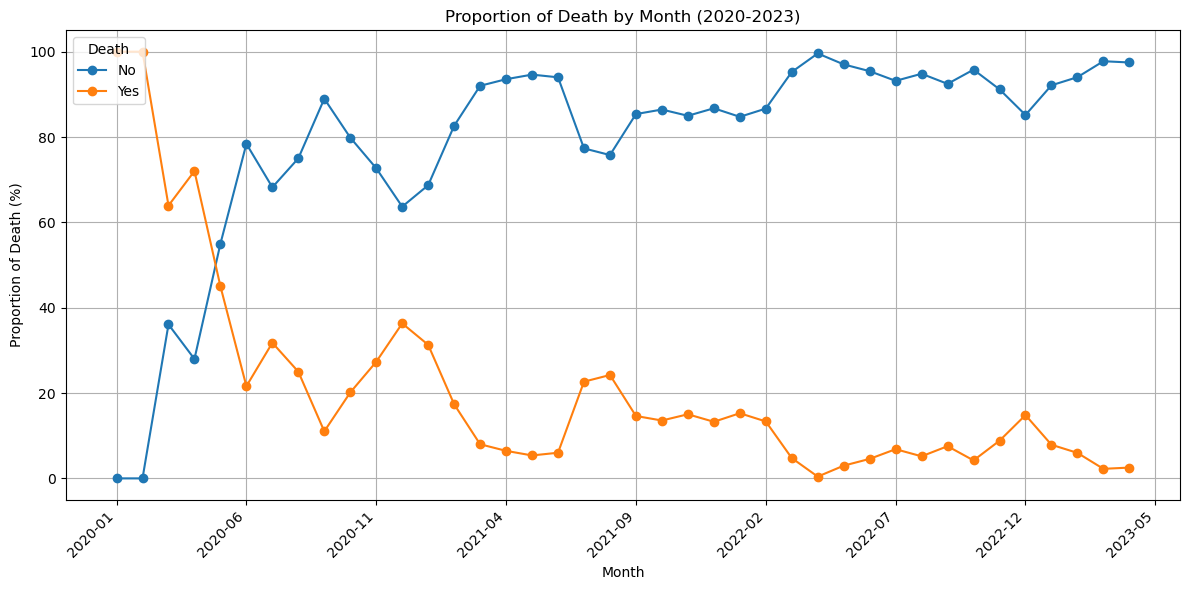

In [360]:
#order of months
month_order = ["2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06",
               "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12",
               "2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06",
               "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12",
               "2022-01", "2022-02", "2022-03", "2022-04", "2022-05", "2022-06",
               "2022-07", "2022-08", "2022-09", "2022-10", "2022-11", "2022-12",
               "2023-01", "2023-02", "2023-03", "2023-04", "2023-05"]

df_2020_to_2023 = df[df["case_month"].str.startswith(("2020", "2021", "2022", "2023"))]

#proportion of death for each month
proportion_death_2020_to_2023 = df_2020_to_2023.groupby(["case_month", "death_yn"]).size().unstack(fill_value=0)
proportion_death_2020_to_2023 = proportion_death_2020_to_2023.div(proportion_death_2020_to_2023.sum(axis=1), axis=0) * 100

#reindex to ensure all months are displayed in correct order
proportion_death_2020_to_2023 = proportion_death_2020_to_2023.reindex(month_order)

proportion_death_2020_to_2023.plot(kind="line", figsize=(12, 6), marker="o")
plt.title("Proportion of Death by Month (2020-2023)")
plt.ylabel("Proportion of Death (%)")
plt.xlabel("Month")
plt.legend(title="Death", loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\35385\AppData\Local\Temp\ipykernel_27904\247629268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_death_state = df.groupby(["res_state", "death_yn"]).size().unstack(fill_value=0)


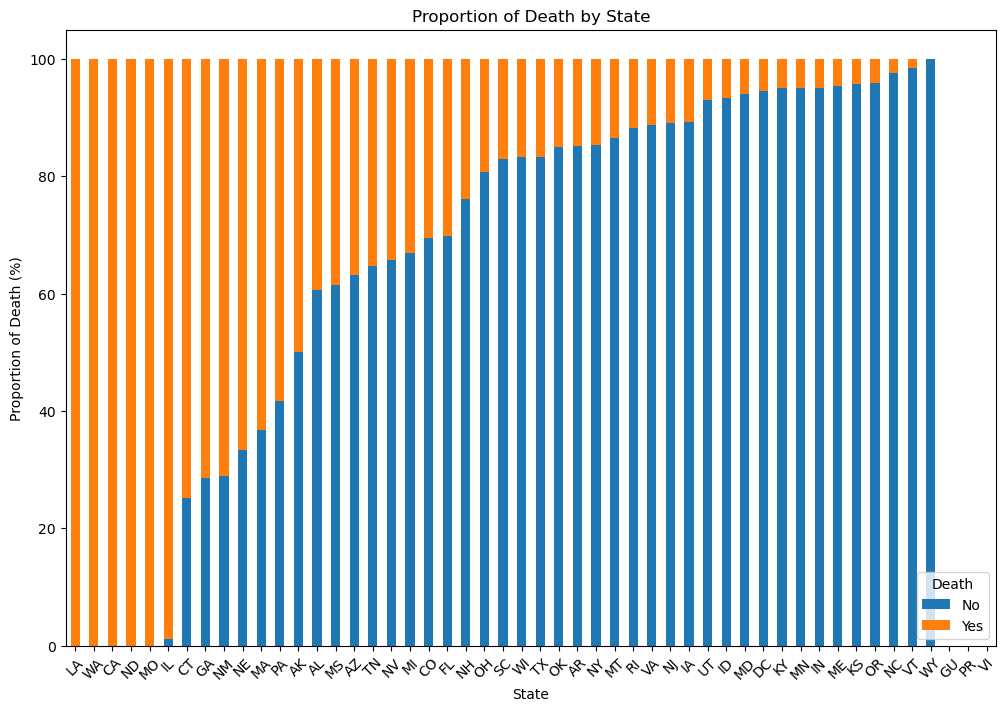

In [361]:
#proportion of death for each state
proportion_death_state = df.groupby(["res_state", "death_yn"]).size().unstack(fill_value=0)
proportion_death_state = proportion_death_state.div(proportion_death_state.sum(axis=1), axis=0) * 100

#sort states based on the highest death "Yes" proportion
sorted_states = proportion_death_state.sort_values(by="Yes", ascending=False)

sorted_states.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Proportion of Death by State")
plt.ylabel("Proportion of Death (%)")
plt.xlabel("State")
plt.legend(title="Death")
plt.xticks(rotation=45)
plt.show()


C:\Users\35385\AppData\Local\Temp\ipykernel_27904\259301919.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_death_age = df.groupby(["age_group", "death_yn"]).size().unstack(fill_value=0)


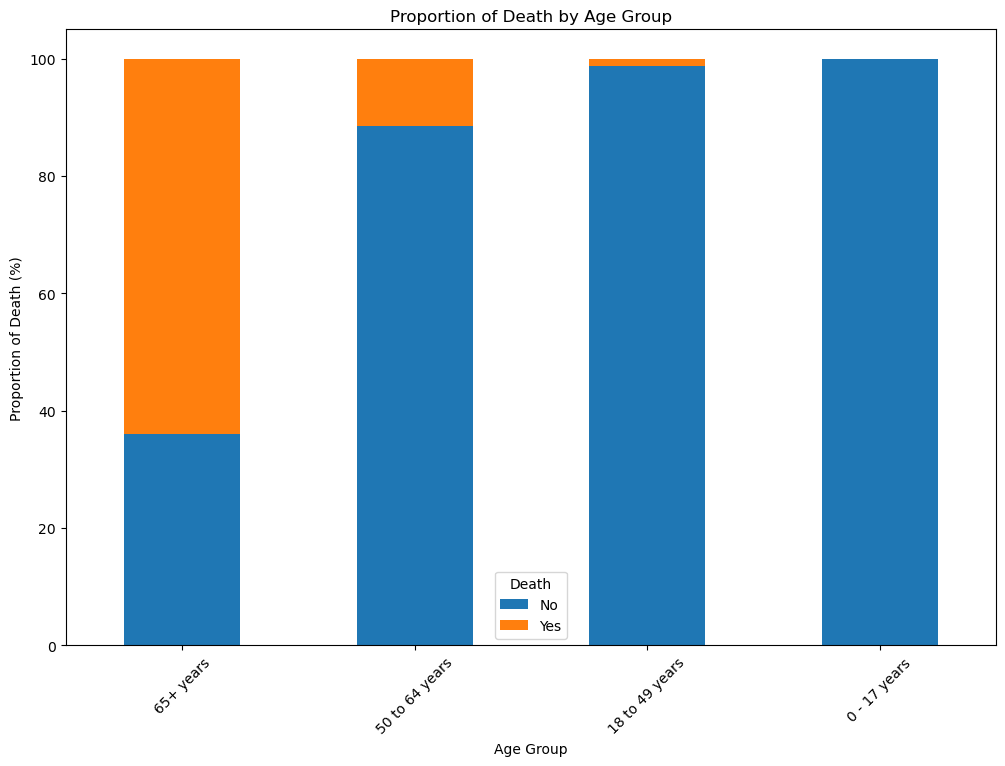

In [362]:
#proportion of death per age group
proportion_death_age = df.groupby(["age_group", "death_yn"]).size().unstack(fill_value=0)
proportion_death_age = proportion_death_age.div(proportion_death_age.sum(axis=1), axis=0) * 100

#sort based on highest death "Yes" proportion
sorted_age_groups = proportion_death_age.sort_values(by="Yes", ascending=False)

sorted_age_groups.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Proportion of Death by Age Group")
plt.ylabel("Proportion of Death (%)")
plt.xlabel("Age Group")
plt.legend(title="Death")
plt.xticks(rotation=45)
plt.show()

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\880905230.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_death_sex = df.groupby(["sex", "death_yn"]).size().unstack(fill_value=0)


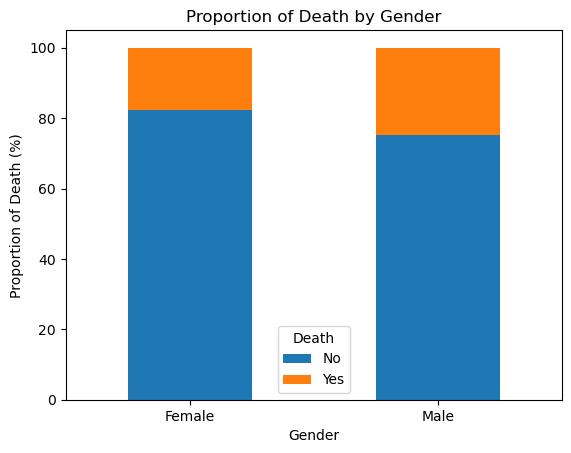

In [363]:
#proportion of death for gender
proportion_death_sex = df.groupby(["sex", "death_yn"]).size().unstack(fill_value=0)
proportion_death_sex = proportion_death_sex.div(proportion_death_sex.sum(axis=1), axis=0) * 100

proportion_death_sex.plot(kind="bar", stacked=True)
plt.title("Proportion of Death by Gender")
plt.ylabel("Proportion of Death (%)")
plt.xlabel("Gender")
plt.legend(title="Death")
plt.xticks(rotation=0)
plt.show()

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\763202031.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_death_race = df.groupby(["race", "death_yn"]).size().unstack(fill_value=0)


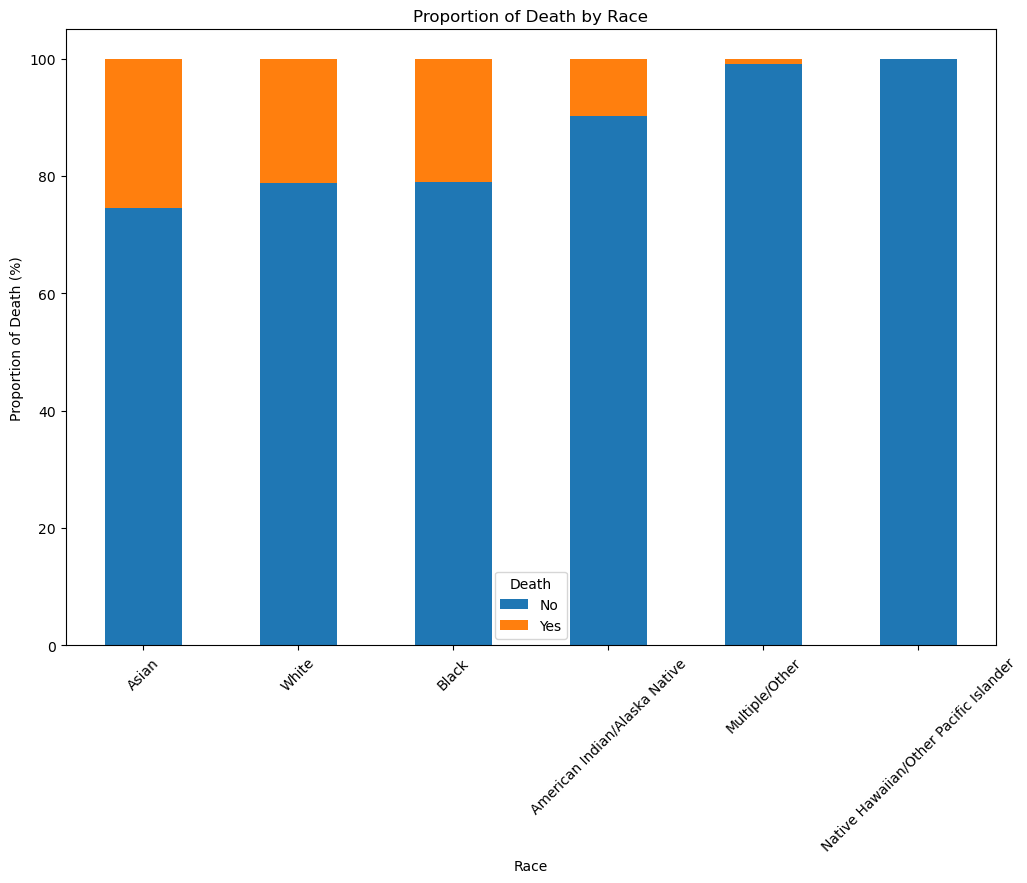

In [364]:
#proportion of death for race
proportion_death_race = df.groupby(["race", "death_yn"]).size().unstack(fill_value=0)
proportion_death_race = proportion_death_race.div(proportion_death_race.sum(axis=1), axis=0) * 100

#sort races based on the highest death "Yes" proportion
sorted_races = proportion_death_race.sort_values(by="Yes", ascending=False)

sorted_races.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Proportion of Death by Race")
plt.ylabel("Proportion of Death (%)")
plt.xlabel("Race")
plt.legend(title="Death")
plt.xticks(rotation=45)
plt.show()

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\2888410743.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_death_ethnicity = df.groupby(["ethnicity", "death_yn"]).size().unstack(fill_value=0)


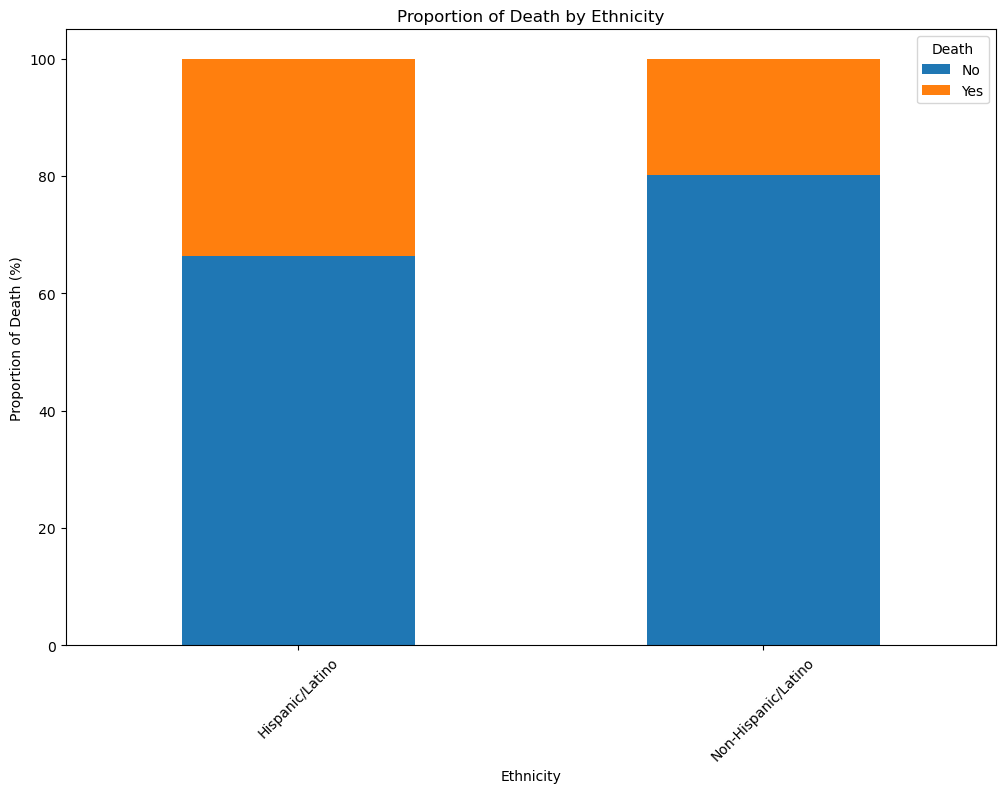

In [365]:
#proportion of death for ethnicity
proportion_death_ethnicity = df.groupby(["ethnicity", "death_yn"]).size().unstack(fill_value=0)
proportion_death_ethnicity = proportion_death_ethnicity.div(proportion_death_ethnicity.sum(axis=1), axis=0) * 100

#sort ethnicities based on the highest death "Yes" proportion
sorted_ethnicities = proportion_death_ethnicity.sort_values(by="Yes", ascending=False)

sorted_ethnicities.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Proportion of Death by Ethnicity")
plt.ylabel("Proportion of Death (%)")
plt.xlabel("Ethnicity")
plt.legend(title="Death")
plt.xticks(rotation=45)
plt.show()

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\851216953.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_death_hosp = df.groupby(["hosp_yn", "death_yn"]).size().unstack(fill_value=0)


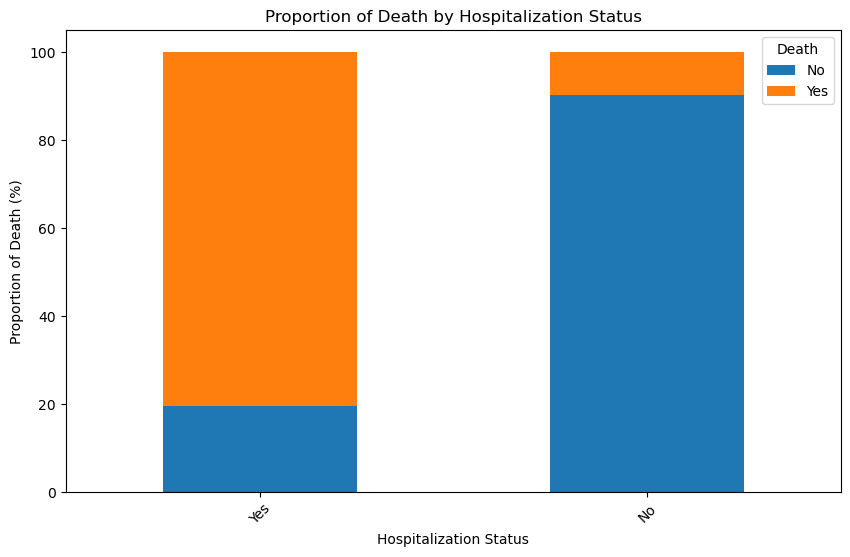

In [366]:
#proportion of death for hosp_yn
proportion_death_hosp = df.groupby(["hosp_yn", "death_yn"]).size().unstack(fill_value=0)
proportion_death_hosp = proportion_death_hosp.div(proportion_death_hosp.sum(axis=1), axis=0) * 100

#sort based on highest death "Yes" proportion
sorted_hosp = proportion_death_hosp.sort_values(by="Yes", ascending=False)

sorted_hosp.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Proportion of Death by Hospitalization Status")
plt.ylabel("Proportion of Death (%)")
plt.xlabel("Hospitalization Status")
plt.legend(title="Death")
plt.xticks(rotation=45)
plt.show()

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\350651169.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_death_county_frequency = df.groupby(["county_frequency_size", "death_yn"]).size().unstack(fill_value=0)


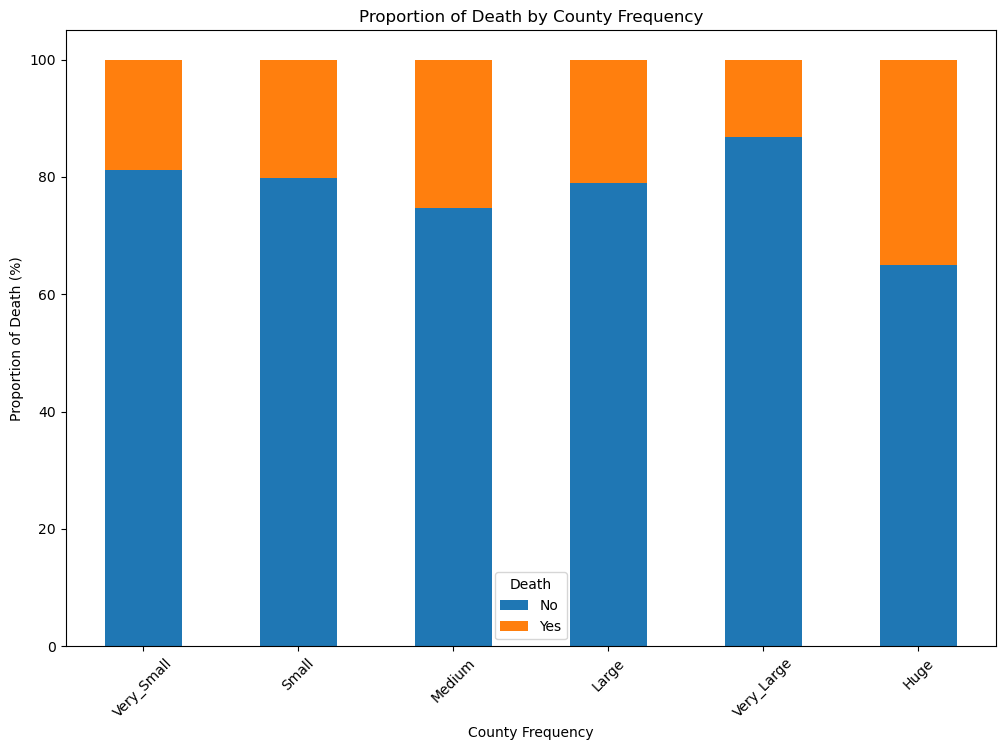

In [367]:
category_order = ["Very_Small", "Small", "Medium", "Large", "Very_Large", "Huge"]

#convert "county_frequency_size" to categorical type with desired order
df["county_frequency_size"] = pd.Categorical(df["county_frequency_size"], categories=category_order, ordered=True)

#proportion of death for each value in county_frequency_size
proportion_death_county_frequency = df.groupby(["county_frequency_size", "death_yn"]).size().unstack(fill_value=0)
proportion_death_county_frequency = proportion_death_county_frequency.div(proportion_death_county_frequency.sum(axis=1), axis=0) * 100

#sort based on above order
proportion_death_county_frequency = proportion_death_county_frequency.reindex(category_order)

proportion_death_county_frequency.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Proportion of Death by County Frequency")
plt.ylabel("Proportion of Death (%)")
plt.xlabel("County Frequency")
plt.legend(title="Death")
plt.xticks(rotation=45)
plt.show()

3 new features have been added to the dataset in order to test the predictions of the model.

- Firstly a social predictor, namely political affiliation (by state), was added. Republican values include conservatism, that is promoting and preserving traditional beliefs and values, including a strong belief in freedom. During the Covid-19 pandemic, the US government"s response presented potential conflict with a belief in freedom: mask-wearing mandates, vaccine policies, the 6-feet isolation guidelines etc. The feature of political affiliation by state was thus chosen to see if there is a relationship between Political Party affiliation and death risk outcome.
- Contrary to expectations, Democrats occupy a higher proportion of deaths due to Covid-19, and make up a higher frequency too. Of the 10 most frequenct states in the dataset, 7 of them are Democratic, and they also have a higher count of death too. 

- Secondly, a new variable called "Profile" was created, capturing an array of demographic and physical traits. Profile combined the characterictics of age_group, sex, race and ethnicity in order to find the most at risk cohorts of people. From this new feature, it appears that 65+ years old male and female non-hispanic/latino people are most at risk. People in this demographic represent a large proportion of the deaths due to Covid-19, approximately 66% of the data. Recommended future research is to compare census statistics regarding the characteristics captured by "profile" to population proportions nationwide, in order to understand if 65+ years old male and female non-hispanic/latino people represent 66% of the populaiton, and if the results of this analysis highlight actual trends.

- Finally, a new feature "seasons" was extended from feature "case_month". This new feature is intended to capture the changes in weather patterns and social behaviour captured over time. During the winter months, friends and families tend to gather over the holidays and Christmas break. Windows are shut due to the cold weather, and people spend much more time indoors. Consequently to this and to being in close proximity with each other, people tend to fall ill, and it is in the spring-time, after having been exposed to covid for a number of weeks, that the death proportion is highest.

In [368]:
new_features_df = pd.read_csv("C:\\Users\\35385\\Desktop\\CS_Spring2024\\DataAnal\\Tom_Gibson_23222095_COMP47350_Homework1.zip\\countypres_2000-2020.csv")
new_features_df = new_features_df[new_features_df["year"] == 2020]
new_features_df.drop(columns=["year", "state", "county_name", "mode", "version", "candidate", "office", "totalvotes"], inplace=True)

#rows with highest number of votes for each county
max_votes_indices = new_features_df.groupby("county_fips")["candidatevotes"].idxmax()
new_features_df = new_features_df.loc[max_votes_indices.values].reset_index(drop=True)

#aggregate data by state and party, summing candidate votes
new_features_df = new_features_df.groupby(["res_state", "party"])["candidatevotes"].sum().reset_index()

#total votes for each party within each state
state_total_votes = new_features_df.groupby("res_state")["candidatevotes"].transform("sum")

# party with the higher total votes for each state
new_features_df["total_state_votes"] = state_total_votes
new_features_df["max_party"] = new_features_df.groupby("res_state")["candidatevotes"].transform("max")
new_features_df = new_features_df[new_features_df["candidatevotes"] == new_features_df["max_party"]]

#drop unnecessary columns
new_features_df.drop(columns=["candidatevotes", "total_state_votes", "max_party"], inplace=True)
new_features_df = pd.merge(df, new_features_df, on="res_state", how="left")



C:\Users\35385\AppData\Local\Temp\ipykernel_27904\1260874245.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = new_features_df.groupby(["party", "death_yn"]).size().unstack(fill_value=0)


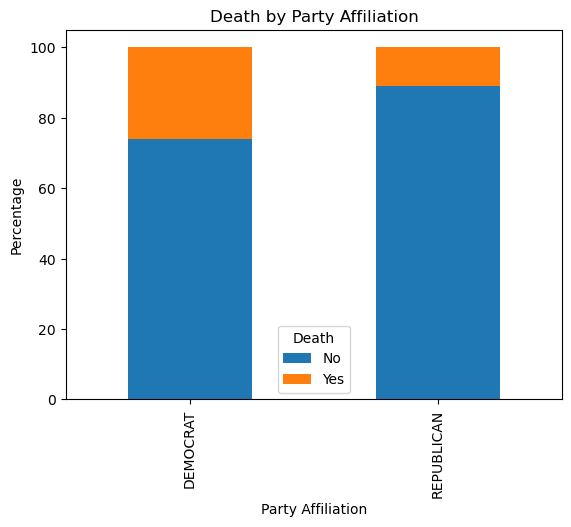

In [369]:
grouped = new_features_df.groupby(["party", "death_yn"]).size().unstack(fill_value=0)
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

grouped.plot(kind="bar", stacked=True)
plt.title("Death by Party Affiliation")
plt.xlabel("Party Affiliation")
plt.ylabel("Percentage")
plt.legend(title="Death")
plt.show()

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\2465716368.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_death_counts = new_features_df.groupby(["res_state", "death_yn"]).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

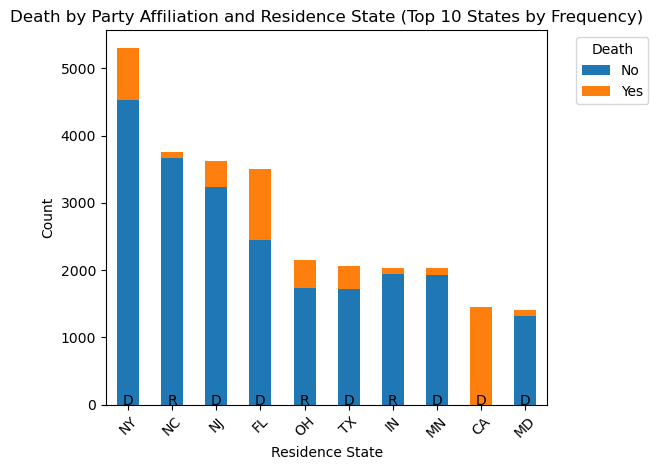

In [370]:
state_death_counts = new_features_df.groupby(["res_state", "death_yn"]).size().unstack(fill_value=0)

#top 10 states based on total death counts
top_10_states = state_death_counts.sum(axis=1).nlargest(10).index

#party counts 
party_counts = state_death_counts.loc[top_10_states]

plt.figure(figsize=(12, 6))
party_counts.plot(kind="bar", stacked=True, color=["#1f77b4", "#ff7f0e"])

for i, state in enumerate(party_counts.index): #add party labels at the bottom
    plt.text(i, -0.1, "D" if "DEMOCRAT" in new_features_df[new_features_df["res_state"] == state]["party"].values else "R", horizontalalignment="center")
plt.title("Death by Party Affiliation and Residence State (Top 10 States by Frequency)")
plt.xlabel("Residence State")
plt.ylabel("Count")
plt.legend(title="Death", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [371]:
# Convert categorical columns to strings
new_features_df["age_group"] = new_features_df["age_group"].astype(str)
new_features_df["race"] = new_features_df["race"].astype(str)
new_features_df["sex"] = new_features_df["sex"].astype(str)
new_features_df["ethnicity"] = new_features_df["ethnicity"].astype(str)

# Replace gender and ethnicity categories with shortened versions
new_features_df["sex"] = new_features_df["sex"].replace({"Male": "_M", "Female": "_F"})
new_features_df["ethnicity"] = new_features_df["ethnicity"].replace({"Hispanic/Latino": "H/L", "Non-Hispanic/Latino": "Non_H/L"})

# Combine age_group, race, sex, and ethnicity into a single feature "profile"
new_features_df["Profile"] = (
    new_features_df["age_group"] + "_" + 
    new_features_df["race"] + "_" + 
    new_features_df["sex"] + "_" + 
    new_features_df["ethnicity"]
)

# Records where death occurred
deceased_df = new_features_df[new_features_df["death_yn"] == "Yes"]

# Frequency of each profile among deceased
profile_counts = deceased_df["Profile"].value_counts()

# Profile with highest frequency among deceased
most_at_risk_profile = profile_counts.idxmax()
frequency_of_most_at_risk_profile = profile_counts.max()

total_deceased = deceased_df.shape[0]
profile_proportions = (profile_counts / total_deceased) * 100  # Calculate proportions as percentages

print("Total Frequencies and Proportions of Each Profile among Deceased:")
print("Profile Frequencies:")
print(profile_counts)
print("\nProfile Proportions (%):")
for profile, proportion in profile_proportions.items():
    print(f"{profile}: {proportion:.4f}%")


Total Frequencies and Proportions of Each Profile among Deceased:
Profile Frequencies:
Profile
65+ years_White__M_Non_H/L                                 2991
65+ years_White__F_Non_H/L                                 2613
65+ years_White__M_H/L                                      466
65+ years_Black__F_Non_H/L                                  411
65+ years_Black__M_Non_H/L                                  371
65+ years_White__F_H/L                                      365
50 to 64 years_White__M_Non_H/L                             278
50 to 64 years_White__M_H/L                                 191
65+ years_Asian__M_Non_H/L                                  129
18 to 49 years_White__M_H/L                                  86
50 to 64 years_Black__M_Non_H/L                              86
65+ years_Asian__F_Non_H/L                                   78
50 to 64 years_White__F_Non_H/L                              66
50 to 64 years_White__F_H/L                                  64
50 to 64 

In [372]:
# Combine age_group, race, sex, and ethnicity into a single feature "profile"
new_features_df["Profile"] = new_features_df["age_group"] + "_" + new_features_df["race"] + "_" + new_features_df["sex"] + "_" + new_features_df["ethnicity"]

# Frequency of each profile among everyone
profile_counts = new_features_df["Profile"].value_counts()

# Convert profile_counts Series to a list
profile_counts_list = profile_counts.reset_index().values.tolist()

# Print total frequencies of each profile among everyone as a list
print("Total Frequencies of Each Profile among Everyone:")
print("Profile Frequencies (Profile, Frequency):")
print(profile_counts_list)


Total Frequencies of Each Profile among Everyone:
Profile Frequencies (Profile, Frequency):
[['18 to 49 years_White__F_Non_H/L', 6872], ['18 to 49 years_White__M_Non_H/L', 5281], ['65+ years_White__F_Non_H/L', 4657], ['65+ years_White__M_Non_H/L', 4638], ['50 to 64 years_White__F_Non_H/L', 2632], ['50 to 64 years_White__M_Non_H/L', 2501], ['0 - 17 years_White__F_Non_H/L', 1988], ['0 - 17 years_White__M_Non_H/L', 1965], ['18 to 49 years_Black__F_Non_H/L', 1193], ['18 to 49 years_White__F_H/L', 799], ['18 to 49 years_Black__M_Non_H/L', 754], ['18 to 49 years_White__M_H/L', 674], ['65+ years_Black__F_Non_H/L', 617], ['65+ years_White__M_H/L', 540], ['65+ years_Black__M_Non_H/L', 479], ['65+ years_White__F_H/L', 443], ['50 to 64 years_Black__F_Non_H/L', 409], ['50 to 64 years_White__M_H/L', 355], ['50 to 64 years_Black__M_Non_H/L', 351], ['0 - 17 years_Black__M_Non_H/L', 343], ['0 - 17 years_Black__F_Non_H/L', 330], ['50 to 64 years_White__F_H/L', 262], ['18 to 49 years_Asian__F_Non_H/L', 

In [373]:
#convert "case_month" to datetime format
new_features_df["case_month"] = pd.to_datetime(new_features_df["case_month"])
new_features_df["month"] = new_features_df["case_month"].dt.month

#function to map months to seasons
def map_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Winter"

#create "seasons" column
new_features_df["seasons"] = new_features_df["month"].apply(map_season)

#drop "month" column, no longer needed
new_features_df.drop(columns=["month"], inplace=True)

C:\Users\35385\AppData\Local\Temp\ipykernel_27904\3065913925.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_death_seasons = new_features_df.groupby(["seasons", "death_yn"]).size().unstack(fill_value=0)


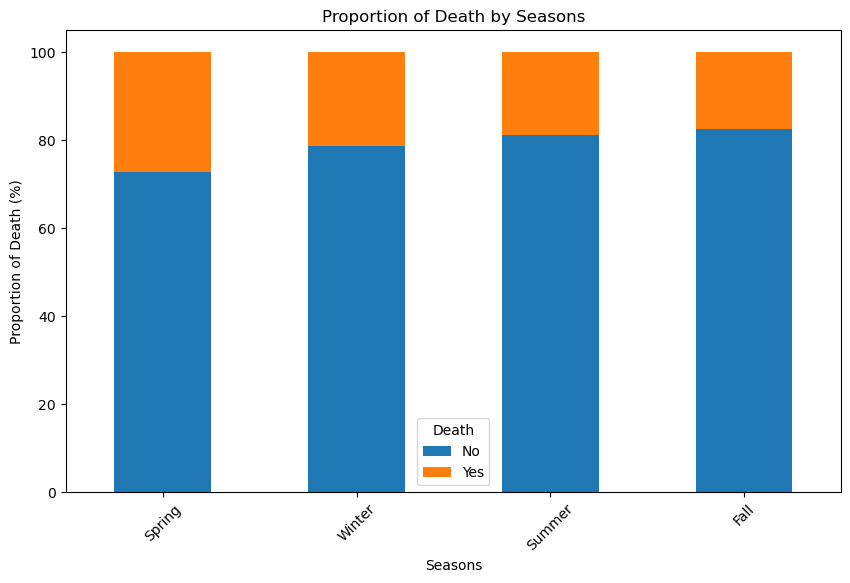

In [374]:
#proportion of death for seasons
proportion_death_seasons = new_features_df.groupby(["seasons", "death_yn"]).size().unstack(fill_value=0)
proportion_death_seasons = proportion_death_seasons.div(proportion_death_seasons.sum(axis=1), axis=0) * 100

#sort based on highest death "Yes" proportion
sorted_seasons = proportion_death_seasons.sort_values(by="Yes", ascending=False)

sorted_seasons.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Proportion of Death by Seasons")
plt.ylabel("Proportion of Death (%)")
plt.xlabel("Seasons")
plt.legend(title="Death")
plt.xticks(rotation=45)
plt.show()

In [375]:
file_path = "C:\\Users\\35385\\Desktop\\CS_Spring2024\\DataAnal\\Tom_Gibson_23222095_COMP47350_Homework1.zip\\new_features_df1.csv"
new_features_df.to_csv(file_path, index=False)